# DATASET


### <p style="background-color:#9452a5; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;"> About The Features</p>

**1. Borough**: The name of the borough in which the property is located.<br>
**2. Neighborhood**: The common name of the neighborhood
<br>
**3.Building Class Category**: This is a field that we are including so that users of the Rolling Sales Files can easily identify similar properties by broad usage (e.g. One Family Homes) without looking up individual Building Classes.
<br>
**4. Tax Class at Present**: Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4), based on the use of the property.
<br>
**5. Block**: A Tax Block is a sub-division of the borough on which real properties are located.
<br>
**6. Lot**: A Tax Lot is a subdivision of a Tax Block and represents the property unique location.
<br>
**7. Easement**: An easement is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property.
<br>
**8. Building Class at Present**: The Building Classification is used to describe a property’s constructive use.
<br>
**9 .Address**: The street address of the property as listed on the Sales File.
<br>
**10. Zip Code**: The property’s postal code
<br>
**11. Residential Units**: The number of residential units at the listed property.
<br>
**12. Commercial Units**: The number of commercial units at the listed property.
<br>
**13. Total Units**: The total number of units at the listed property.
<br>
**14. Land Square Feet**: The land area of the property listed in square feet.
<br>
**15. Gross Square Feet**: The total area of all the floors of a building as measured from the exterior surfaces of the outside walls of the building, including the land area and space within any building or structure on the property.
<br>
**16. Year Built**: Year the structure on the property was built.
<br>
**17. Building Class at Time of Sale**: The Building Classification is used to describe a property’s constructive use.
<br>
**18. Sales Price**: Price paid for the property.
<br>
**19. Sale Date**: Date the property sold.
<br>
**19. Apartment Number**: The number of the apartment.

## Import Modules, Load Data and Data Review

In [36]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from skimpy import clean_columns

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (7,4)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)





In [37]:
import sklearn
sklearn.__version__

'1.4.1.post1'

In [38]:
df0 = pd.read_csv("nyc-rolling-sales.csv")
df = df0.copy()

In [39]:
df.head()

Unnamed: 0  BOROUGH   NEIGHBORHOOD  \
0           4        1  ALPHABET CITY   
1           5        1  ALPHABET CITY   
2           6        1  ALPHABET CITY   
3           7        1  ALPHABET CITY   
4           8        1  ALPHABET CITY   

                       BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  BLOCK  \
0  07 RENTALS - WALKUP APARTMENTS                                2A    392   
1  07 RENTALS - WALKUP APARTMENTS                                 2    399   
2  07 RENTALS - WALKUP APARTMENTS                                 2    399   
3  07 RENTALS - WALKUP APARTMENTS                                2B    402   
4  07 RENTALS - WALKUP APARTMENTS                                2A    404   

   LOT EASE-MENT BUILDING CLASS AT PRESENT                 ADDRESS  \
0    6                                  C2            153 AVENUE B   
1   26                                  C7   234 EAST 4TH   STREET   
2   39                                  C7   197 EAST 3RD   STREET   
3   21                                  C4     154 EAST 7TH STREET   
4   55                                  C2  301 EAST 10TH   STREET   

  APARTMENT NUMBER  ZIP CODE  RESIDENTIAL UNITS  COMMERCIAL UNITS  \
0                      10009                  5                 0   
1                      10009                 28                 3   
2                      10009                 16                 1   
3                      10009                 10                 0   
4                      10009                  6                 0   

   TOTAL UNITS LAND SQUARE FEET GROSS SQUARE FEET  YEAR BUILT  \
0            5             1633              6440        1900   
1           31             4616             18690        1900   
2           17             2212              7803        1900   
3           10             2272              6794        1913   
4            6             2369              4615        1900   

   TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE SALE PRICE  \
0                          2                             C2    6625000   
1                          2                             C7        -     
2                          2                             C7        -     
3                          2                             C4    3936272   
4                          2                             C2    8000000   

             SALE DATE  
0  2017-07-19 00:00:00  
1  2016-12-14 00:00:00  
2  2016-12-09 00:00:00  
3  2016-09-23 00:00:00  
4  2016-11-17 00:00:00

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [41]:
df.shape

(84548, 22)

## Data Cleaning

In [42]:
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [43]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [44]:
from skimpy import clean_columns

df = clean_columns(df)
df.head(3)

21 column names have been cleaned

borough   neighborhood                      building_class_category  \
0        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
1        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                
2        1  ALPHABET CITY  07 RENTALS - WALKUP APARTMENTS                

  tax_class_at_present  block  lot ease_ment building_class_at_present  \
0                   2A    392    6                                  C2   
1                    2    399   26                                  C7   
2                    2    399   39                                  C7   

                 address apartment_number  zip_code  residential_units  \
0           153 AVENUE B                      10009                  5   
1  234 EAST 4TH   STREET                      10009                 28   
2  197 EAST 3RD   STREET                      10009                 16   

   commercial_units  total_units land_square_feet gross_square_feet  \
0                 0            5             1633              6440   
1                 3           31             4616             18690   
2                 1           17             2212              7803   

   year_built  tax_class_at_time_of_sale building_class_at_time_of_sale  \
0        1900                          2                             C2   
1        1900                          2                             C7   
2        1900                          2                             C7   

  sale_price            sale_date  
0    6625000  2017-07-19 00:00:00  
1        -    2016-12-14 00:00:00  
2        -    2016-12-09 00:00:00

In [45]:
sorted(df.columns)

['address',
 'apartment_number',
 'block',
 'borough',
 'building_class_at_present',
 'building_class_at_time_of_sale',
 'building_class_category',
 'commercial_units',
 'ease_ment',
 'gross_square_feet',
 'land_square_feet',
 'lot',
 'neighborhood',
 'residential_units',
 'sale_date',
 'sale_price',
 'tax_class_at_present',
 'tax_class_at_time_of_sale',
 'total_units',
 'year_built',
 'zip_code']

In [46]:
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

def check_obj_columns(df):
    '''
    Returns NO PROBLEM or column/s which has/have mixed object types.
    '''    
    
    tdf = df.select_dtypes(include=['object']).applymap(type)
    for col in tdf:
        if len(set(tdf[col].values)) > 1:
            print("Column" + " " + color.BOLD + color.RED + col + color.END + " " + "has mixed object types." )
    else:
        if len(set(tdf[col].values)) == 1:
            print(color.BOLD + color.GREEN + "NO PROBLEM" + " " + color.END + " " + "with the data types of Columns in the DataFrame.")

check_obj_columns(df)

NO PROBLEM  with the data types of Columns in the DataFrame.


In [47]:
df.select_dtypes(include=['object']).applymap(type)

neighborhood building_class_category tax_class_at_present  \
0      <class 'str'>           <class 'str'>        <class 'str'>   
1      <class 'str'>           <class 'str'>        <class 'str'>   
2      <class 'str'>           <class 'str'>        <class 'str'>   
3      <class 'str'>           <class 'str'>        <class 'str'>   
4      <class 'str'>           <class 'str'>        <class 'str'>   
...              ...                     ...                  ...   
84543  <class 'str'>           <class 'str'>        <class 'str'>   
84544  <class 'str'>           <class 'str'>        <class 'str'>   
84545  <class 'str'>           <class 'str'>        <class 'str'>   
84546  <class 'str'>           <class 'str'>        <class 'str'>   
84547  <class 'str'>           <class 'str'>        <class 'str'>   

           ease_ment building_class_at_present        address  \
0      <class 'str'>             <class 'str'>  <class 'str'>   
1      <class 'str'>             <class 'str'>  <class 'str'>   
2      <class 'str'>             <class 'str'>  <class 'str'>   
3      <class 'str'>             <class 'str'>  <class 'str'>   
4      <class 'str'>             <class 'str'>  <class 'str'>   
...              ...                       ...            ...   
84543  <class 'str'>             <class 'str'>  <class 'str'>   
84544  <class 'str'>             <class 'str'>  <class 'str'>   
84545  <class 'str'>             <class 'str'>  <class 'str'>   
84546  <class 'str'>             <class 'str'>  <class 'str'>   
84547  <class 'str'>             <class 'str'>  <class 'str'>   

      apartment_number land_square_feet gross_square_feet  \
0        <class 'str'>    <class 'str'>     <class 'str'>   
1        <class 'str'>    <class 'str'>     <class 'str'>   
2        <class 'str'>    <class 'str'>     <class 'str'>   
3        <class 'str'>    <class 'str'>     <class 'str'>   
4        <class 'str'>    <class 'str'>     <class 'str'>   
...                ...              ...               ...   
84543    <class 'str'>    <class 'str'>     <class 'str'>   
84544    <class 'str'>    <class 'str'>     <class 'str'>   
84545    <class 'str'>    <class 'str'>     <class 'str'>   
84546    <class 'str'>    <class 'str'>     <class 'str'>   
84547    <class 'str'>    <class 'str'>     <class 'str'>   

      building_class_at_time_of_sale     sale_price      sale_date  
0                      <class 'str'>  <class 'str'>  <class 'str'>  
1                      <class 'str'>  <class 'str'>  <class 'str'>  
2                      <class 'str'>  <class 'str'>  <class 'str'>  
3                      <class 'str'>  <class 'str'>  <class 'str'>  
4                      <class 'str'>  <class 'str'>  <class 'str'>  
...                              ...            ...            ...  
84543                  <class 'str'>  <class 'str'>  <class 'str'>  
84544                  <class 'str'>  <class 'str'>  <class 'str'>  
84545                  <class 'str'>  <class 'str'>  <class 'str'>  
84546                  <class 'str'>  <class 'str'>  <class 'str'>  
84547                  <class 'str'>  <class 'str'>  <class 'str'>  

[84548 rows x 12 columns]

In [48]:
df[df["sale_price"]==' -  '].T

1      \
borough                                                                   1   
neighborhood                                                  ALPHABET CITY   
building_class_category         07 RENTALS - WALKUP APARTMENTS                
tax_class_at_present                                                      2   
block                                                                   399   
lot                                                                      26   
ease_ment                                                                     
building_class_at_present                                                C7   
address                                               234 EAST 4TH   STREET   
apartment_number                                                              
zip_code                                                              10009   
residential_units                                                        28   
commercial_units                                                          3   
total_units                                                              31   
land_square_feet                                                       4616   
gross_square_feet                                                     18690   
year_built                                                             1900   
tax_class_at_time_of_sale                                                 2   
building_class_at_time_of_sale                                           C7   
sale_price                                                              -     
sale_date                                               2016-12-14 00:00:00   

                                                                      2      \
borough                                                                   1   
neighborhood                                                  ALPHABET CITY   
building_class_category         07 RENTALS - WALKUP APARTMENTS                
tax_class_at_present                                                      2   
block                                                                   399   
lot                                                                      39   
ease_ment                                                                     
building_class_at_present                                                C7   
address                                               197 EAST 3RD   STREET   
apartment_number                                                              
zip_code                                                              10009   
residential_units                                                        16   
commercial_units                                                          1   
total_units                                                              17   
land_square_feet                                                       2212   
gross_square_feet                                                      7803   
year_built                                                             1900   
tax_class_at_time_of_sale                                                 2   
building_class_at_time_of_sale                                           C7   
sale_price                                                              -     
sale_date                                               2016-12-09 00:00:00   

                                                                      5      \
borough                                                                   1   
neighborhood                                                  ALPHABET CITY   
building_class_category         07 RENTALS - WALKUP APARTMENTS                
tax_class_at_present                                                      2   
block                                                                   405   
lot                                                                      16   
ease_ment                              

In [49]:
df['borough'] = df['borough'].astype(str)
df['borough'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)
df['sale_date'] = pd.to_datetime(df['sale_date'])
df['sale_month']= df['sale_date'].dt.month
df['sale_year']= df['sale_date'].dt.year

Data types of some features changed

# Feature Enginnering

In [50]:
#is the building pre or post war?
df['age_category'] = np.where(df['year_built']<=1945,'Pre-War','Post-War')

#create a new column for age of the unit
df['age'] = 2021 - df['year_built']

# Convert to Category
df['age_category'] = df['age_category'].astype('category')

In [51]:
df.sample(5)

borough    neighborhood                      building_class_category  \
70513    Queens   RICHMOND HILL  02 TWO FAMILY DWELLINGS                       
23231     Bronx       RIVERDALE  10 COOPS - ELEVATOR APARTMENTS                
67429    Queens  MIDDLE VILLAGE  02 TWO FAMILY DWELLINGS                       
32733  Brooklyn        CANARSIE  03 THREE FAMILY DWELLINGS                     
31200  Brooklyn     BROWNSVILLE  02 TWO FAMILY DWELLINGS                       

      tax_class_at_present  block  lot ease_ment building_class_at_present  \
70513                    1   9577   18                                  B3   
23231                    2   5953  240                                  D4   
67429                    1   3058   40                                  B1   
32733                    1   8088   32                                  C0   
31200                    1   3726    3                                  S2   

                      address apartment_number  zip_code  residential_units  \
70513   104-30 124TH   STREET                      11419                  2   
23231  5900 ARLINGTON AVE, 2C                      10471                  0   
67429       66-30 74TH STREET                      11379                  2   
32733  27 PAERDEGAT 15 STREET                      11236                  3   
31200  405 MOTHER GASTON BLVD                      11212                  2   

       commercial_units  total_units land_square_feet gross_square_feet  \
70513                 0            2             2025              1496   
23231                 0            0                0                 0   
67429                 0            2             2000              3000   
32733                 0            3             2133              2945   
31200                 1            3             1917              3642   

       year_built  tax_class_at_time_of_sale building_class_at_time_of_sale  \
70513        1920                          1                             B3   
23231        1962                          2                             D4   
67429        1901                          1                             B1   
32733        1960                          1                             C0   
31200        1930                          1                             S2   

      sale_price  sale_date  sale_month  sale_year age_category  age  
70513     410000 2017-06-28           6       2017      Pre-War  101  
23231     423000 2017-08-04           8       2017     Post-War   59  
67429     890000 2017-01-27           1       2017      Pre-War  120  
32733     350000 2016-12-01          12       2016     Post-War   61  
31200         10 2016-12-28          12       2016      Pre-War   91

In [52]:
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease_ment',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date', 'sale_month', 'sale_year', 'age_category',
       'age'],
      dtype='object')

In [53]:
# Convert objects to categorical variables
cats = ['neighborhood', 'building_class_category', 'tax_class_at_present',
       'ease_ment', 'building_class_at_present', 'address', 'apartment_number',
       'building_class_at_time_of_sale', 'block', 'lot', 'zip_code',
            'tax_class_at_time_of_sale']

for colname in cats:
    df[colname] = df[colname].astype('category')  

In [54]:
numer = ['land_square_feet','gross_square_feet', 'sale_price']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   borough                         84548 non-null  object        
 1   neighborhood                    84548 non-null  category      
 2   building_class_category         84548 non-null  category      
 3   tax_class_at_present            84548 non-null  category      
 4   block                           84548 non-null  category      
 5   lot                             84548 non-null  category      
 6   ease_ment                       84548 non-null  category      
 7   building_class_at_present       84548 non-null  category      
 8   address                         84548 non-null  category      
 9   apartment_number                84548 non-null  category      
 10  zip_code                        84548 non-null  category      
 11  re

# Missing Values

In [56]:
df.isnull().sum()

borough                               0
neighborhood                          0
building_class_category               0
tax_class_at_present                  0
block                                 0
lot                                   0
ease_ment                             0
building_class_at_present             0
address                               0
apartment_number                      0
zip_code                              0
residential_units                     0
commercial_units                      0
total_units                           0
land_square_feet                  26252
gross_square_feet                 27612
year_built                            0
tax_class_at_time_of_sale             0
building_class_at_time_of_sale        0
sale_price                        14561
sale_date                             0
sale_month                            0
sale_year                             0
age_category                          0
age                                   0


In [57]:
# Percentage of missing values
df.isnull().sum()/df.shape[0]*100

borough                            0.000000
neighborhood                       0.000000
building_class_category            0.000000
tax_class_at_present               0.000000
block                              0.000000
lot                                0.000000
ease_ment                          0.000000
building_class_at_present          0.000000
address                            0.000000
apartment_number                   0.000000
zip_code                           0.000000
residential_units                  0.000000
commercial_units                   0.000000
total_units                        0.000000
land_square_feet                  31.049818
gross_square_feet                 32.658372
year_built                         0.000000
tax_class_at_time_of_sale          0.000000
building_class_at_time_of_sale     0.000000
sale_price                        17.222170
sale_date                          0.000000
sale_month                         0.000000
sale_year                       

## Sale price is a target feature and many sales are low price 
$0 most commonly because of  transfering parents inherently.

## Number of uniques in category features

In [58]:
for i in df.select_dtypes("category"):
    print(f"{i:<30}:", df[i].nunique())

neighborhood                  : 254
building_class_category       : 47
tax_class_at_present          : 11
block                         : 11566
lot                           : 2627
ease_ment                     : 1
building_class_at_present     : 167
address                       : 67563
apartment_number              : 3989
zip_code                      : 186
tax_class_at_time_of_sale     : 4
building_class_at_time_of_sale: 166
age_category                  : 2


In [59]:
df[df.land_square_feet.isna() & df.gross_square_feet.isna()].T

12     \
borough                                                           Manhattan   
neighborhood                                                  ALPHABET CITY   
building_class_category         09 COOPS - WALKUP APARTMENTS                  
tax_class_at_present                                                      2   
block                                                                   373   
lot                                                                      40   
ease_ment                                                                     
building_class_at_present                                                C6   
address                                               327 EAST 3 STREET, 1C   
apartment_number                                                              
zip_code                                                              10009   
residential_units                                                         0   
commercial_units                                                          0   
total_units                                                               0   
land_square_feet                                                        NaN   
gross_square_feet                                                       NaN   
year_built                                                             1920   
tax_class_at_time_of_sale                                                 2   
building_class_at_time_of_sale                                           C6   
sale_price                                                              1.0   
sale_date                                               2016-09-06 00:00:00   
sale_month                                                                9   
sale_year                                                              2016   
age_category                                                        Pre-War   
age                                                                     101   

                                                                      13     \
borough                                                           Manhattan   
neighborhood                                                  ALPHABET CITY   
building_class_category         09 COOPS - WALKUP APARTMENTS                  
tax_class_at_present                                                      2   
block                                                                   373   
lot                                                                      40   
ease_ment                                                                     
building_class_at_present                                                C6   
address                                               327 EAST 3 STREET, 1C   
apartment_number                                                              
zip_code                                                              10009   
residential_units                                                         0   
commercial_units                                                          0   
total_units                                                               0   
land_square_feet                                                        NaN   
gross_square_feet                                                       NaN   
year_built                                                             1920   
tax_class_at_time_of_sale                                                 2   
building_class_at_time_of_sale                                           C6   
sale_price                                                         499000.0   
sale_date                                               2017-03-10 00:00:00   
sale_month                                                                3   
sale_year                                                              2017   
age_category                                                        Pre-War   
age                                     

## I can not fill the missing values  because of not enough information. Moreover, sale price is target feature. Thus, I drop missing values.

In [60]:
df.dropna(inplace=True)

In [61]:
df.isna().sum()

borough                           0
neighborhood                      0
building_class_category           0
tax_class_at_present              0
block                             0
lot                               0
ease_ment                         0
building_class_at_present         0
address                           0
apartment_number                  0
zip_code                          0
residential_units                 0
commercial_units                  0
total_units                       0
land_square_feet                  0
gross_square_feet                 0
year_built                        0
tax_class_at_time_of_sale         0
building_class_at_time_of_sale    0
sale_price                        0
sale_date                         0
sale_month                        0
sale_year                         0
age_category                      0
age                               0
dtype: int64

In [62]:
df.describe().T

count          mean           std     min      25%  \
residential_units  48244.0  2.566537e+00  1.746548e+01     0.0      1.0   
commercial_units   48244.0  2.491709e-01  1.098807e+01     0.0      0.0   
total_units        48244.0  2.834632e+00  2.075042e+01     0.0      1.0   
land_square_feet   48244.0  3.358117e+03  3.143590e+04     0.0   1413.0   
gross_square_feet  48244.0  3.669753e+03  2.947491e+04     0.0    828.0   
year_built         48244.0  1.827765e+03  4.643612e+02     0.0   1920.0   
sale_price         48244.0  1.153281e+06  1.340131e+07     0.0  80420.0   
sale_month         48244.0  6.588094e+00  3.476790e+00     1.0      4.0   
sale_year          48244.0  2.016647e+03  4.780214e-01  2016.0   2016.0   
age                48244.0  1.932348e+02  4.643612e+02     4.0     60.0   

                        50%       75%           max  
residential_units       1.0       2.0  1.844000e+03  
commercial_units        0.0       0.0  2.261000e+03  
total_units             1.0       2.0  2.261000e+03  
land_square_feet     2140.0    3071.0  4.228300e+06  
gross_square_feet    1620.0    2520.0  3.750565e+06  
year_built           1931.0    1961.0  2.017000e+03  
sale_price         480000.0  830000.0  2.210000e+09  
sale_month              6.0      10.0  1.200000e+01  
sale_year            2017.0    2017.0  2.017000e+03  
age                    90.0     101.0  2.021000e+03

In [63]:
#check dataframe where year_built is 0 years
df[df['year_built']==0]

borough    neighborhood  \
18364          Bronx        BATHGATE   
18371          Bronx        BATHGATE   
18373          Bronx        BATHGATE   
18756          Bronx      BAYCHESTER   
18757          Bronx      BAYCHESTER   
...              ...             ...   
53841         Queens          CORONA   
54054         Queens          CORONA   
57321         Queens  FLUSHING-NORTH   
65906         Queens     LITTLE NECK   
82002  Staten Island     PRINCES BAY   

                           building_class_category tax_class_at_present block  \
18364  29 COMMERCIAL GARAGES                                          4  2918   
18371  31 COMMERCIAL VACANT LAND                                      4  3028   
18373  41 TAX CLASS 4 - OTHER                                         4  2900   
18756  05 TAX CLASS 1 VACANT LAND                                    1B  4725   
18757  05 TAX CLASS 1 VACANT LAND                                    1B  4726   
...                                            ...                  ...   ...   
53841  07 RENTALS - WALKUP APARTMENTS                                2B  1785   
54054  41 TAX CLASS 4 - OTHER                                         4  1961   
57321  08 RENTALS - ELEVATOR APARTMENTS                              2B  5186   
65906  01 ONE FAMILY DWELLINGS                                        1  8229   
82002  02 TWO FAMILY DWELLINGS                                        1  6979   

       lot ease_ment building_class_at_present                address  \
18364   29                                  G7   1885 BATHGATE AVENUE   
18371   13                                  V9    1996 WEBSTER AVENUE   
18373    1                                  Z9    1816 WEBSTER AVENUE   
18756   26                                  V0      1475 HICKS STREET   
18757   38                                  V0  3552 EASTCHESTER ROAD   
...    ...       ...                       ...                    ...   
53841   22                                  C1   112-48 38TH   AVENUE   
54054    1                                  Z9  5506 VAN CLEEF STREET   
57321   56                                  D3   142-11 CHERRY AVENUE   
65906   80                                  A3    45-39 BROWVALE LANE   
82002  314                                  B9     153 EL CAMINO LOOP   

      apartment_number zip_code  residential_units  commercial_units  \
18364                     10457                  0                 0   
18371                         0                  0                 0   
18373                     10457                  0                 0   
18756                     10469                  0                 0   
18757                     10469                  0                 0   
...                ...      ...                ...               ...   
53841                     11368                  8                 0   
54054                     11368                  0                 0   
57321                     11355                 10                 0   
65906                     11362                  1                 0   
82002                     10309                  2                 0   

       total_units  land_square_feet  gross_square_feet  year_built  \
18364            0            3070.0                0.0           0   
18371            0            5945.0                0.0           0   
18373            0            3082.0                0.0           0   
18756            0            2375.0                0.0           0   
18757            0            3400.0                0.0           0   
...            ...               ...                ...         ...   
53841            8            2500.0             6875.0           0   
54054            0             926.0              384.0           0   
57321           10            2850.0            10111.0           0   
65906            1            9562.0             5291.0           0   
82002            2            2115.0

**year_built, land_square_feet and gross_square_feet can not be zero.**

In [64]:
#remove rows where year_built = 0 or land_square_feet = 0 or gross_square_feet = 0
df = df[(df['year_built']!=0) & (df['land_square_feet']!=0) & (df['gross_square_feet']!=0)]

In [65]:
df.describe().apply(lambda s: s.apply('{0:.3f}'.format)).T

count         mean           std       min         25%  \
residential_units  36805.000        3.182        19.821     0.000       1.000   
commercial_units   36805.000        0.323        12.579     0.000       0.000   
total_units        36805.000        3.504        23.604     0.000       1.000   
land_square_feet   36805.000     4197.334     35778.418   200.000    2000.000   
gross_square_feet  36805.000     4790.491     33637.493    60.000    1428.000   
year_built         36805.000     1939.078        30.281  1800.000    1920.000   
sale_price         36805.000  1305840.983  15185705.889     0.000  160000.000   
sale_month         36805.000        6.588         3.488     1.000       4.000   
sale_year          36805.000     2016.642         0.479  2016.000    2016.000   
age                36805.000       81.922        30.281     4.000      66.000   

                          50%         75%             max  
residential_units       2.000       2.000        1844.000  
commercial_units        0.000       0.000        2261.000  
total_units             2.000       2.000        2261.000  
land_square_feet     2500.000    3800.000     4228300.000  
gross_square_feet    2000.000    2898.000     3750565.000  
year_built           1930.000    1955.000        2017.000  
sale_price         504237.000  840000.000  2210000000.000  
sale_month              6.000      10.000          12.000  
sale_year            2017.000    2017.000        2017.000  
age                    91.000     101.000         221.000

# Univariate Analysis

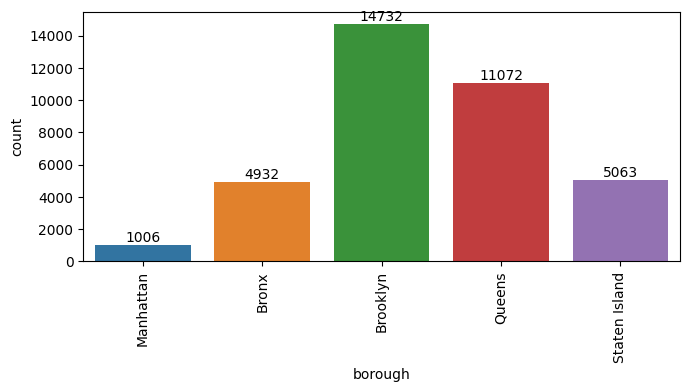

In [66]:

ax = sns.countplot(data=df, x= "borough")
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()



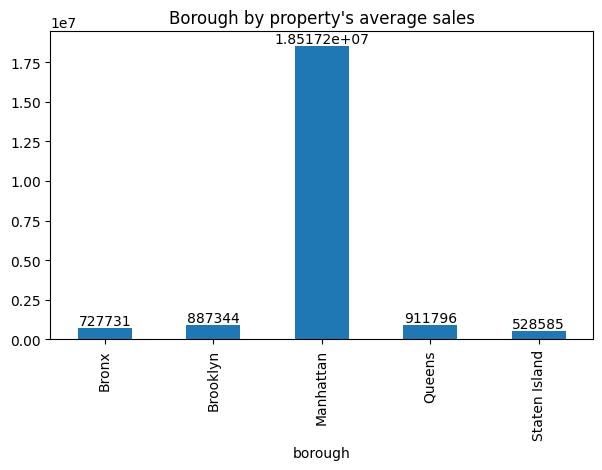

In [67]:
ax = df['sale_price'].groupby(df['borough']).mean().plot.bar()
ax.bar_label(ax.containers[0]);
plt.title("Borough by property's average sales");

## Although Manhattan has the largest average sale price, Brooklyn has the most sale records.

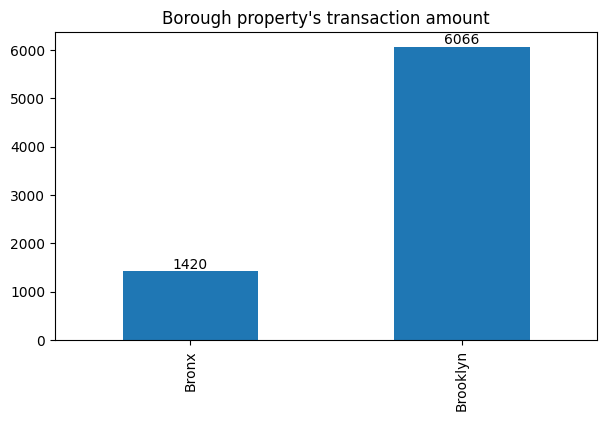

In [68]:
ax = df[df['sale_price'] == 0]['borough'].value_counts().sort_values().plot.bar()
ax.bar_label(ax.containers[0]);
plt.title("Borough property's transaction amount");

## Brooklyn has the most property transactions because of sale price 0 means that it is a property transaction

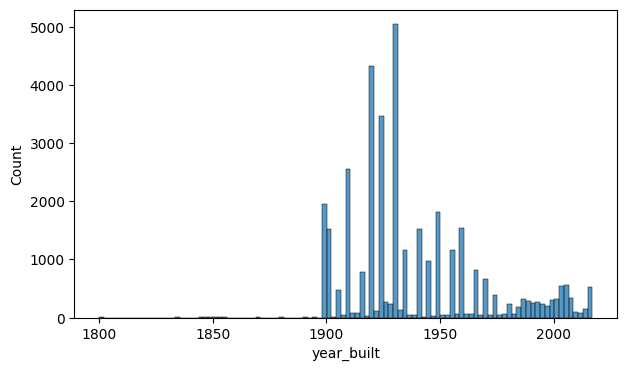

In [69]:
sns.histplot(df['year_built']);

In [70]:
df['year_built'].value_counts()

1920    4281
1930    3579
1925    3381
1910    2518
1950    1788
1899    1663
1901    1516
1940    1507
1960    1504
1931    1470
1935    1153
1955    1132
1945     952
1965     809
1915     765
1970     655
1905     439
1975     356
2004     347
2005     302
1900     299
2015     296
2006     261
2007     252
2016     230
1980     218
2003     189
1990     171
1987     170
2001     166
1928     158
1986     156
2002     154
1999     148
2000     147
1989     146
1988     145
1927     136
1996     134
1985     129
1926     127
2014     111
1997     107
1992     106
1995      96
1998      94
1993      86
1924      86
2008      81
1929      79
1991      73
1994      72
1933      67
1923      63
1984      58
2009      58
1932      55
1911      48
1922      47
2011      44
2013      44
1983      43
1921      43
1914      43
2012      42
1906      39
1957      38
1974      37
1978      37
2010      37
1959      35
1913      34
1973      34
1909      33
1961      32
1977      31
1963      31

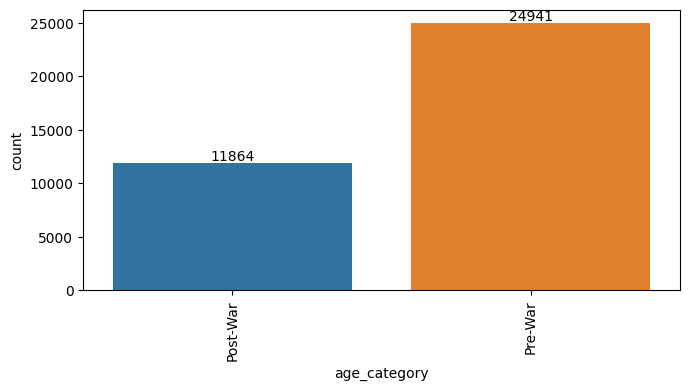

In [71]:
ax = sns.countplot(data=df, x= "age_category")
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Most of the properties that sold  is built in Pre-War where the maximum properties sales is in 1920. 

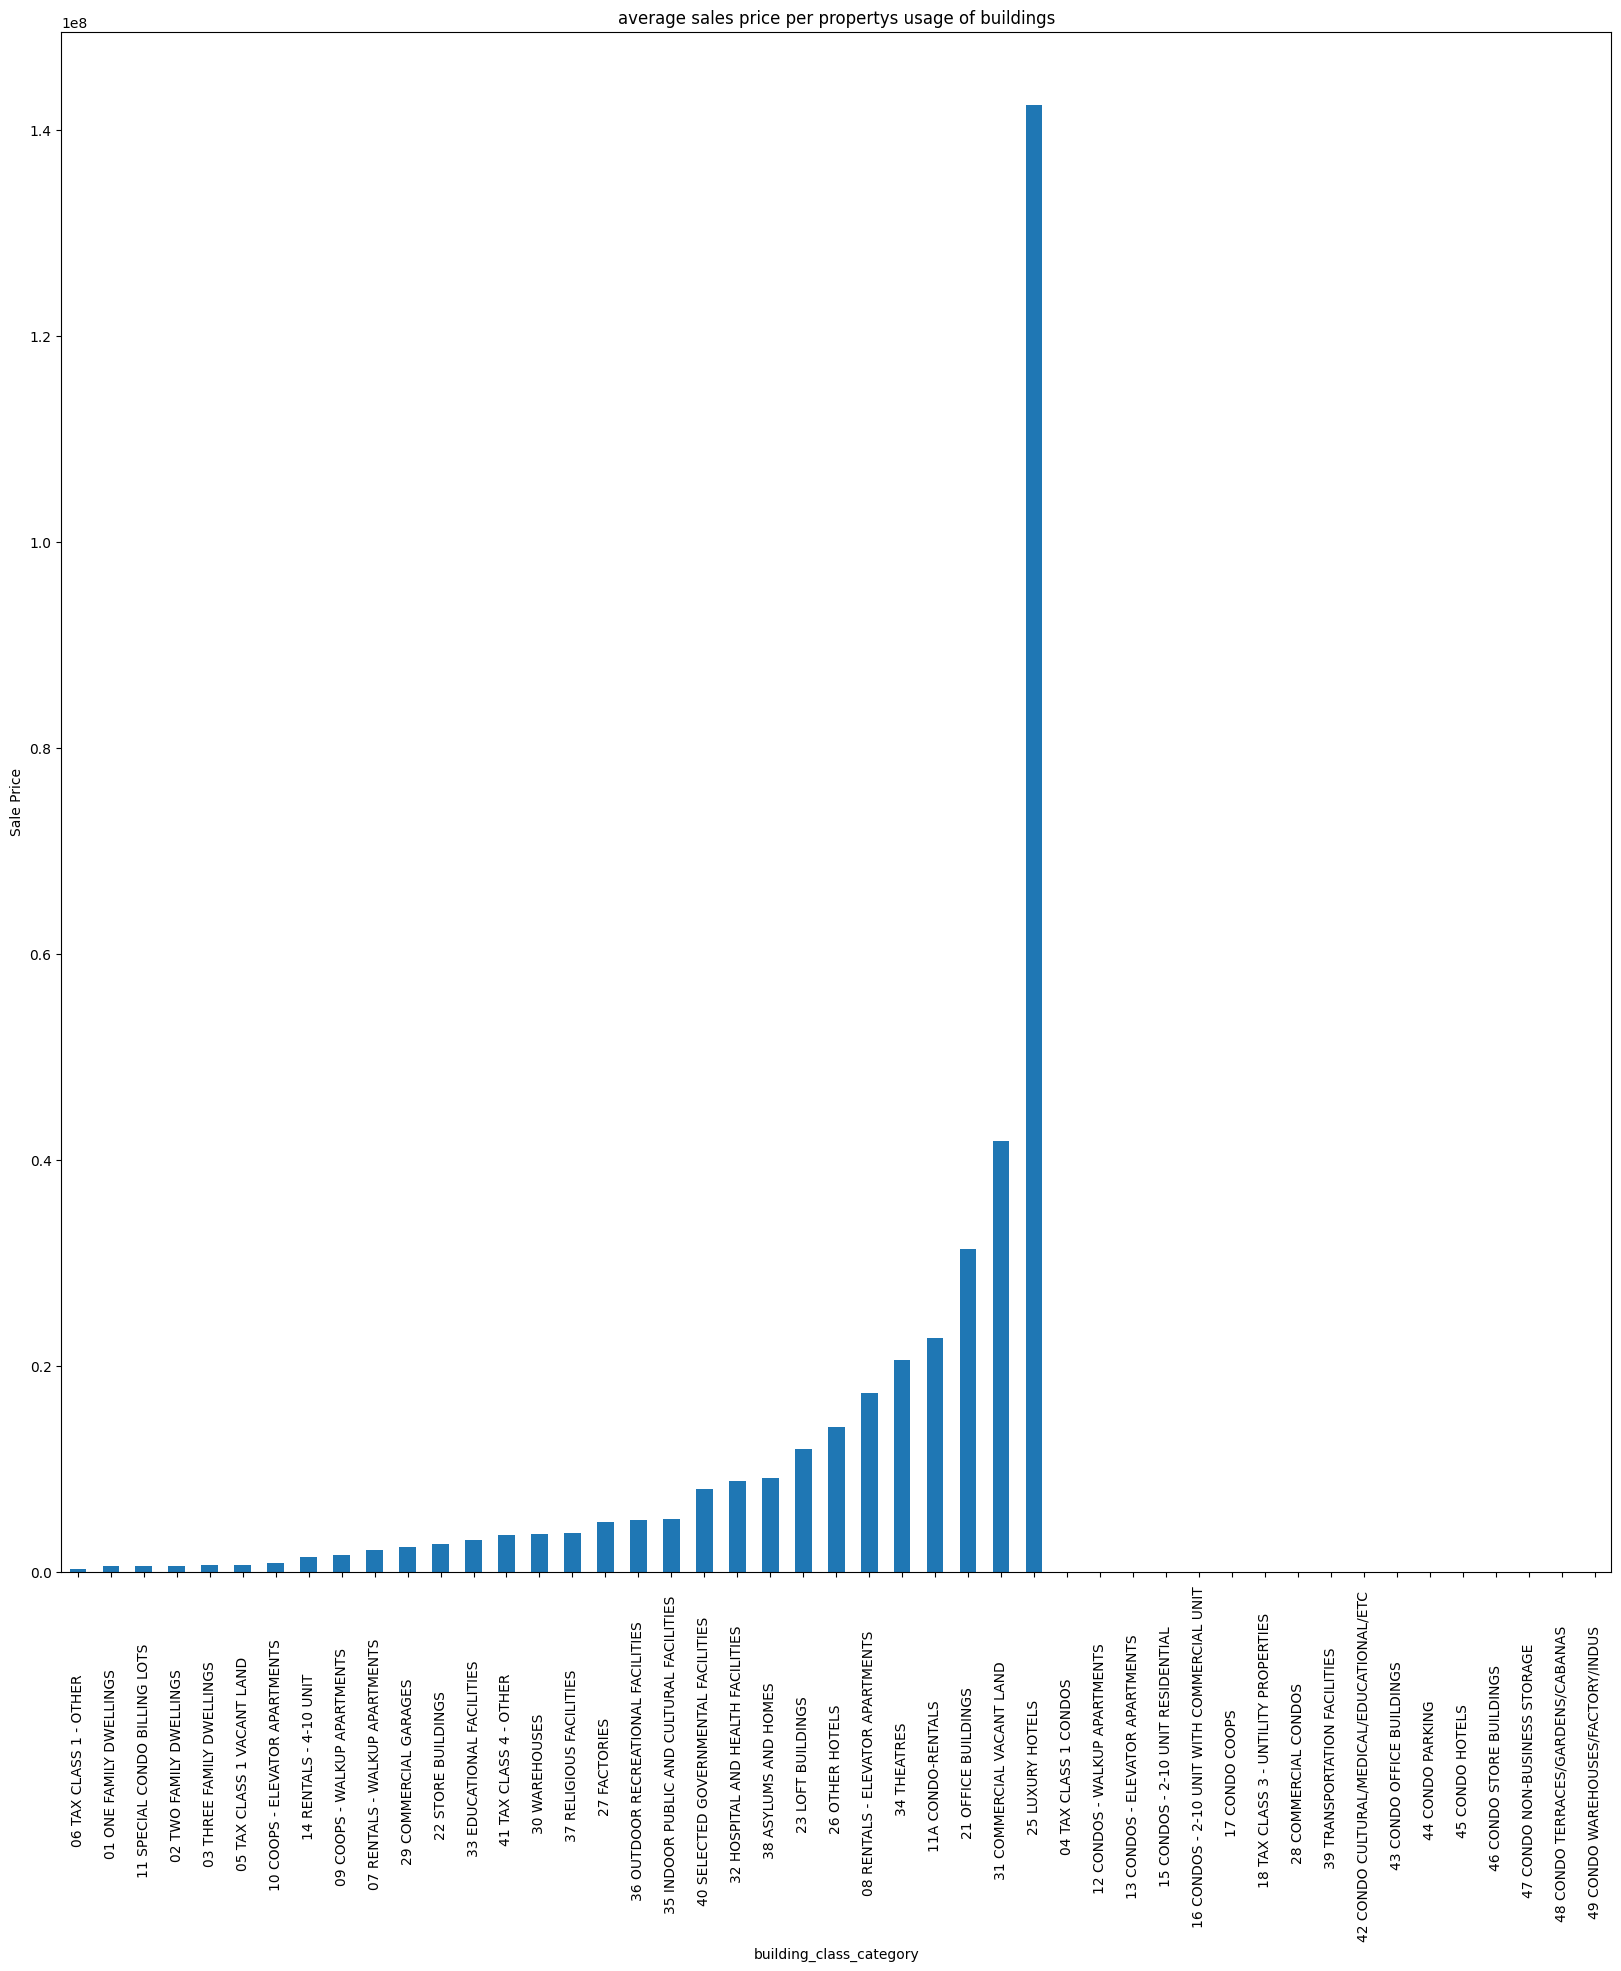

In [72]:
plt.figure(figsize=(20,20))

df['sale_price'].groupby(df['building_class_category']).mean().sort_values().plot.bar()
plt.ylabel("Sale Price")

plt.title('average sales price per propertys usage of buildings');

## Luxury hotels, commercial vacant land, office buildings have the highest sale price meanly.

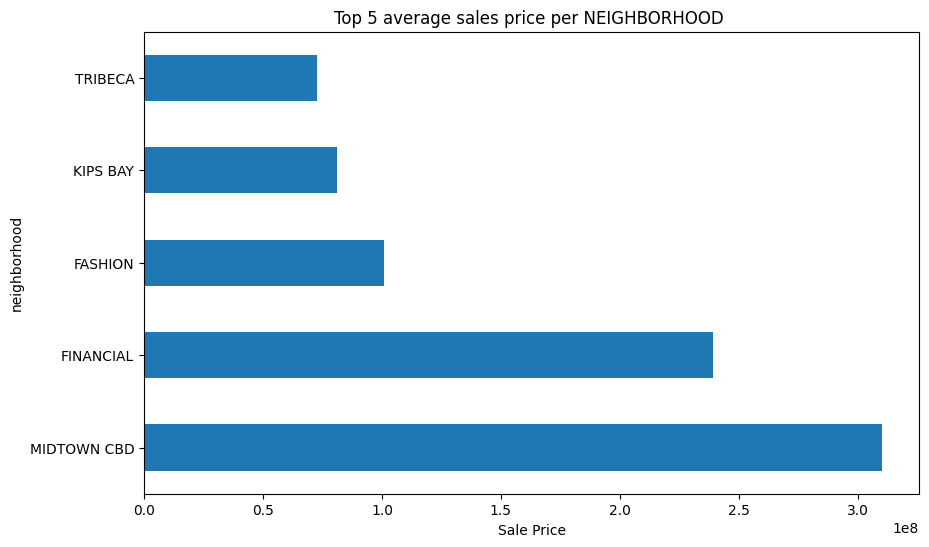

In [73]:
plt.figure(figsize=(10,6))
df['sale_price'].groupby(df['neighborhood']).mean().sort_values(ascending=False)[:5].plot.barh()
plt.title('Top 5 average sales price per NEIGHBORHOOD ')
plt.xlabel("Sale Price");

##  Midtown CBD and Financial have the largest average sales.

# Bivariate Analysis

<Axes: xlabel='age', ylabel='sale_price'>

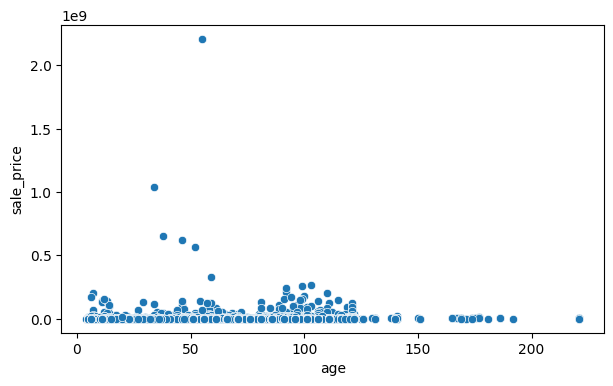

In [74]:
sns.scatterplot(x=df["age"], y=df["sale_price"])

## There are many outliers in sale_price. Our sale price bound is 0.5*10**9

<Axes: xlabel='age', ylabel='sale_price'>

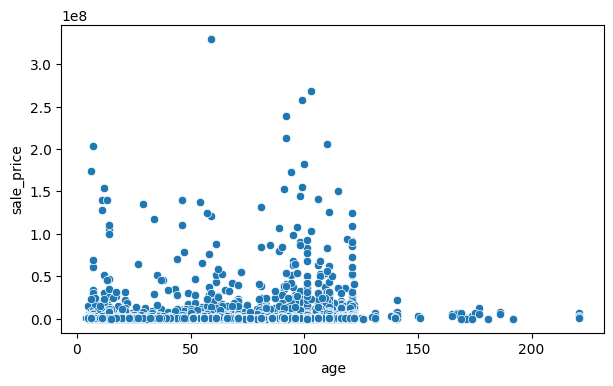

In [75]:
df = df[df["sale_price"] < .5*10**9]
sns.scatterplot(x=df["age"], y=df["sale_price"])

In [76]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

count           mean            std         min  \
residential_units  36800.00000        3.15823       19.27114     0.00000   
commercial_units   36800.00000        0.32052       12.57535     0.00000   
total_units        36800.00000        3.47753       23.13388     0.00000   
land_square_feet   36800.00000     4188.38505    35769.63224   200.00000   
gross_square_feet  36800.00000     4636.99372    30606.20375    60.00000   
year_built         36800.00000     1939.07310       30.28014  1800.00000   
sale_price         36800.00000  1167784.71149  6179814.02914     0.00000   
sale_month         36800.00000        6.58783        3.48760     1.00000   
sale_year          36800.00000     2016.64217        0.47937  2016.00000   
age                36800.00000       81.92690       30.28014     4.00000   

                            25%           50%           75%              max  
residential_units       1.00000       2.00000       2.00000       1844.00000  
commercial_units        0.00000       0.00000       0.00000       2261.00000  
total_units             1.00000       2.00000       2.00000       2261.00000  
land_square_feet     2000.00000    2500.00000    3796.25000    4228300.00000  
gross_square_feet    1428.00000    2000.00000    2898.00000    3750565.00000  
year_built           1920.00000    1930.00000    1955.00000       2017.00000  
sale_price         159688.25000  503897.50000  840000.00000  330000000.00000  
sale_month              4.00000       6.00000      10.00000         12.00000  
sale_year            2016.00000    2017.00000    2017.00000       2017.00000  
age                    66.00000      91.00000     101.00000        221.00000

<Axes: xlabel='sale_price', ylabel='Density'>

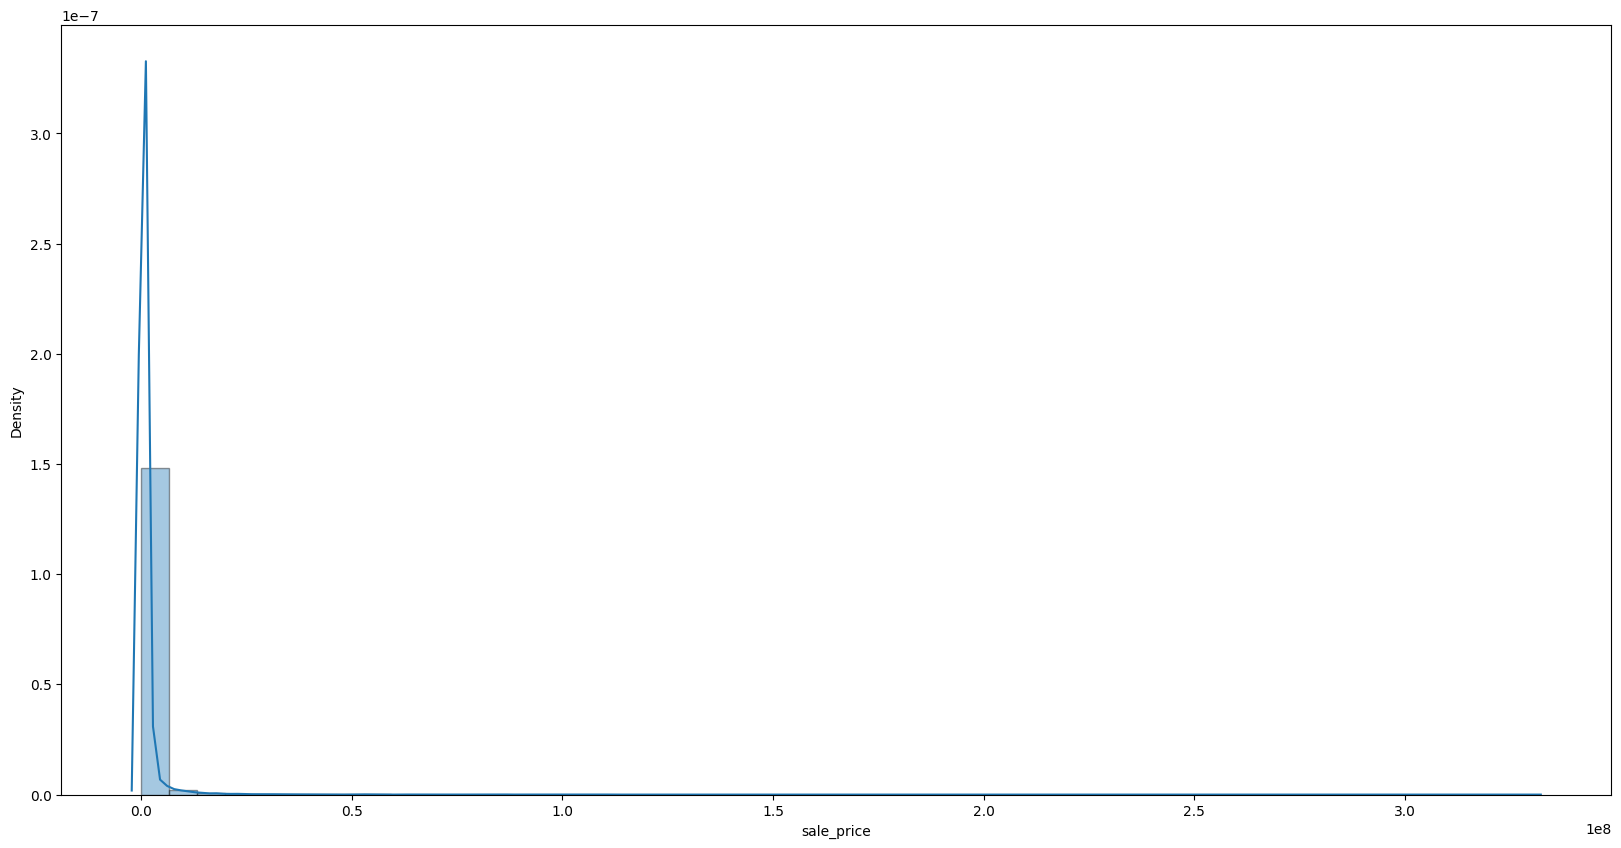

In [77]:
plt.figure(figsize = (20,10))
sns.distplot(df['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

## We must decrease the sale_price bound.

<Axes: xlabel='sale_price', ylabel='Count'>

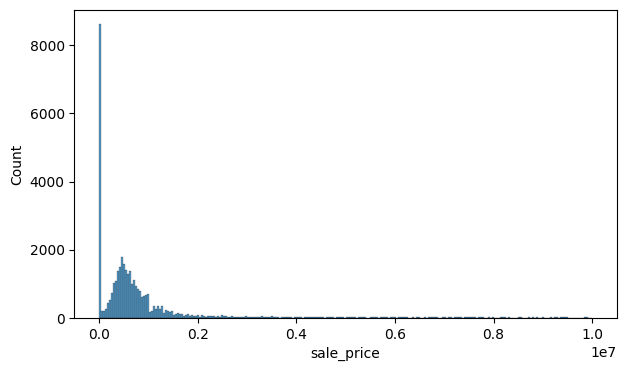

In [78]:
sns.histplot(df[df["sale_price"] < 10000000].sale_price)

## There are many outliers and zero sale prices (property transactions) are dropped.

In [79]:
df = df[(df['sale_price'] <5000000) & (df['sale_price'] != 0)] 

<Axes: xlabel='sale_price', ylabel='Density'>

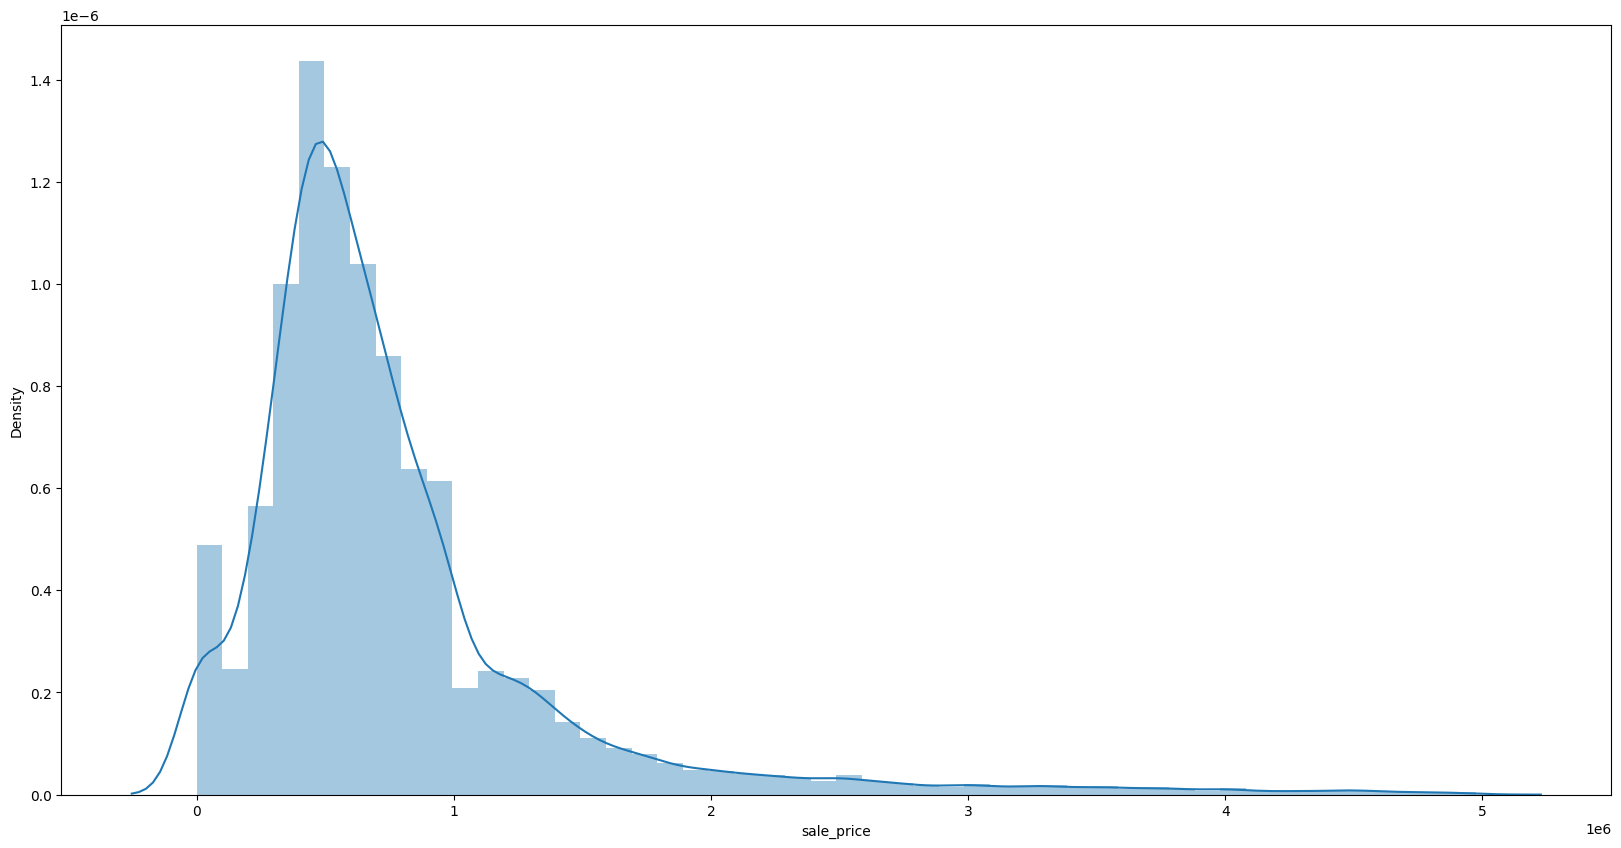

In [80]:
#df = df[(df["sale_price"] < 500000) & (df["sale_price"] > 0)]

plt.figure(figsize = (20,10))
sns.distplot(df['sale_price'], kde = True)

In [81]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

count          mean           std         min  \
residential_units  28207.00000       2.17109      13.33397     0.00000   
commercial_units   28207.00000       0.20470      13.51836     0.00000   
total_units        28207.00000       2.37462      19.07034     0.00000   
land_square_feet   28207.00000    3814.92076   35284.42440   200.00000   
gross_square_feet  28207.00000    3106.44152   26358.64327   120.00000   
year_built         28207.00000    1941.18194      30.44789  1800.00000   
sale_price         28207.00000  766102.58606  651702.65398     1.00000   
sale_month         28207.00000       6.58227       3.47212     1.00000   
sale_year          28207.00000    2016.64605       0.47820  2016.00000   
age                28207.00000      79.81806      30.44789     4.00000   

                            25%           50%           75%            max  
residential_units       1.00000       2.00000       2.00000     1844.00000  
commercial_units        0.00000       0.00000       0.00000     2261.00000  
total_units             1.00000       2.00000       2.00000     2261.00000  
land_square_feet     2000.00000    2500.00000    3880.00000  4228300.00000  
gross_square_feet    1348.00000    1827.00000    2530.00000  3750565.00000  
year_built           1920.00000    1930.00000    1960.00000     2017.00000  
sale_price         410000.00000  600000.00000  900000.00000  4975000.00000  
sale_month              4.00000       6.00000      10.00000       12.00000  
sale_year            2016.00000    2017.00000    2017.00000     2017.00000  
age                    61.00000      91.00000     101.00000      221.00000

# More Works on Outliers

<Axes: xlabel='land_square_feet', ylabel='Density'>

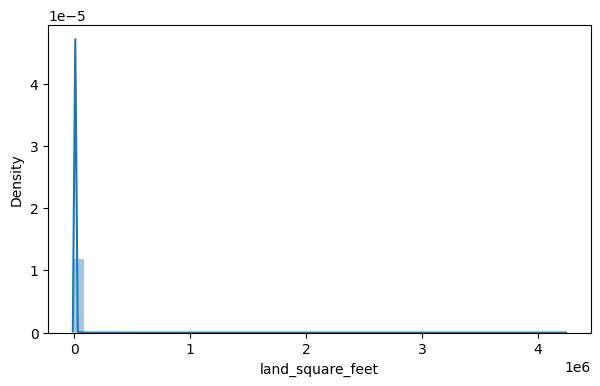

In [82]:
sns.distplot(df['land_square_feet'], kde = True)

<Axes: xlabel='land_square_feet', ylabel='sale_price'>

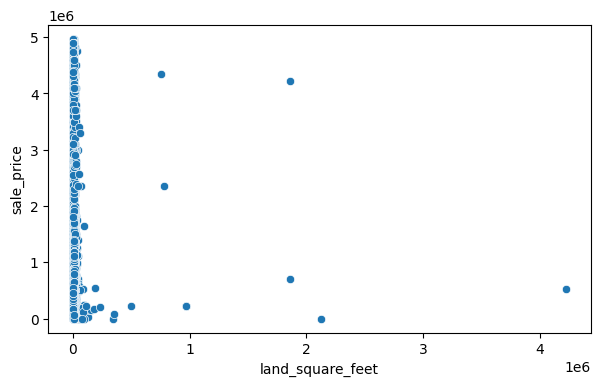

In [83]:
sns.scatterplot(data=df, x="land_square_feet", y="sale_price")

<Axes: xlabel='gross_square_feet', ylabel='sale_price'>

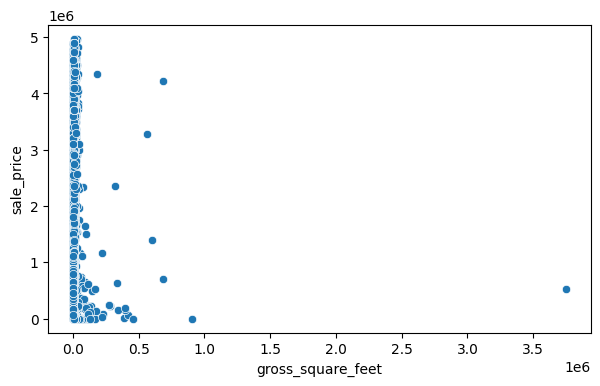

In [84]:
sns.scatterplot(data=df, x="gross_square_feet", y="sale_price")

In [85]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

count          mean           std         min  \
residential_units  28207.00000       2.17109      13.33397     0.00000   
commercial_units   28207.00000       0.20470      13.51836     0.00000   
total_units        28207.00000       2.37462      19.07034     0.00000   
land_square_feet   28207.00000    3814.92076   35284.42440   200.00000   
gross_square_feet  28207.00000    3106.44152   26358.64327   120.00000   
year_built         28207.00000    1941.18194      30.44789  1800.00000   
sale_price         28207.00000  766102.58606  651702.65398     1.00000   
sale_month         28207.00000       6.58227       3.47212     1.00000   
sale_year          28207.00000    2016.64605       0.47820  2016.00000   
age                28207.00000      79.81806      30.44789     4.00000   

                            25%           50%           75%            max  
residential_units       1.00000       2.00000       2.00000     1844.00000  
commercial_units        0.00000       0.00000       0.00000     2261.00000  
total_units             1.00000       2.00000       2.00000     2261.00000  
land_square_feet     2000.00000    2500.00000    3880.00000  4228300.00000  
gross_square_feet    1348.00000    1827.00000    2530.00000  3750565.00000  
year_built           1920.00000    1930.00000    1960.00000     2017.00000  
sale_price         410000.00000  600000.00000  900000.00000  4975000.00000  
sale_month              4.00000       6.00000      10.00000       12.00000  
sale_year            2016.00000    2017.00000    2017.00000     2017.00000  
age                    61.00000      91.00000     101.00000      221.00000

In [86]:
df = df[(df['sale_price'] > 10000)  #removes all properties less than $10,000
                       & (df['residential_units'] < 500) #limit up to 500 units
                       & (df['commercial_units'] < 126) #limit up to 126 units
                       & (df['gross_square_feet'] < 500000) #removes instances where gross sf is greater than 500000 SF
                       & (df['land_square_feet'] < 500000) #removes instances where land sf is greater than 500000 SF
                       & (df['total_units'] < 1000)] #limit up to 1000 units

# Duplicated rows

In [87]:
df.duplicated(keep='first').sum()

95

In [88]:
df[df.duplicated()]

borough            neighborhood  \
4173       Manhattan  GREENWICH VILLAGE-WEST   
9616       Manhattan            MIDTOWN WEST   
9618       Manhattan            MIDTOWN WEST   
9619       Manhattan            MIDTOWN WEST   
9620       Manhattan            MIDTOWN WEST   
9621       Manhattan            MIDTOWN WEST   
9623       Manhattan            MIDTOWN WEST   
9624       Manhattan            MIDTOWN WEST   
9625       Manhattan            MIDTOWN WEST   
9626       Manhattan            MIDTOWN WEST   
9627       Manhattan            MIDTOWN WEST   
9629       Manhattan            MIDTOWN WEST   
9632       Manhattan            MIDTOWN WEST   
9633       Manhattan            MIDTOWN WEST   
9637       Manhattan            MIDTOWN WEST   
9639       Manhattan            MIDTOWN WEST   
9640       Manhattan            MIDTOWN WEST   
9641       Manhattan            MIDTOWN WEST   
9642       Manhattan            MIDTOWN WEST   
9643       Manhattan            MIDTOWN WEST   
9644       Manhattan            MIDTOWN WEST   
9645       Manhattan            MIDTOWN WEST   
9646       Manhattan            MIDTOWN WEST   
9647       Manhattan            MIDTOWN WEST   
9648       Manhattan            MIDTOWN WEST   
9649       Manhattan            MIDTOWN WEST   
9652       Manhattan            MIDTOWN WEST   
9653       Manhattan            MIDTOWN WEST   
9654       Manhattan            MIDTOWN WEST   
9655       Manhattan            MIDTOWN WEST   
9656       Manhattan            MIDTOWN WEST   
9657       Manhattan            MIDTOWN WEST   
9658       Manhattan            MIDTOWN WEST   
9659       Manhattan            MIDTOWN WEST   
9660       Manhattan            MIDTOWN WEST   
9661       Manhattan            MIDTOWN WEST   
9663       Manhattan            MIDTOWN WEST   
19555          Bronx   CASTLE HILL/UNIONPORT   
19817          Bronx            COUNTRY CLUB   
24254          Bronx             THROGS NECK   
26997       Brooklyn      BEDFORD STUYVESANT   
28091       Brooklyn             BENSONHURST   
29092       Brooklyn            BOROUGH PARK   
32168       Brooklyn                CANARSIE   
34190       Brooklyn           CROWN HEIGHTS   
34191       Brooklyn           CROWN HEIGHTS   
35101       Brooklyn           CYPRESS HILLS   
35103       Brooklyn           CYPRESS HILLS   
35104       Brooklyn           CYPRESS HILLS   
35105       Brooklyn           CYPRESS HILLS   
37326       Brooklyn        FLATBUSH-CENTRAL   
37472       Brooklyn        FLATBUSH-CENTRAL   
39714       Brooklyn                 GOWANUS   
41380       Brooklyn                 MADISON   
43181       Brooklyn              OCEAN HILL   
48097       Brooklyn       WILLIAMSBURG-EAST   
50266         Queens                 ASTORIA   
51406         Queens                 BAYSIDE   
52169         Queens            BELLE HARBOR   
54406         Queens           EAST ELMHURST   
57303         Queens          FLUSHING-NORTH   
60473         Queens            FOREST HILLS   
63266         Queens            HOWARD BEACH   
63919         Queens         JACKSON HEIGHTS   
63922         Queens         JACKSON HEIGHTS   
66492         Queens        LONG ISLAND CITY   
66493         Queens        LONG ISLAND CITY   
66548         Queens        LONG ISLAND CITY   
73880         Queens     SPRINGFIELD GARDENS   
74145         Queens              ST. ALBANS   
74594         Queens               SUNNYSIDE   
74643         Queens               SUNNYSIDE   
74646         Queens               SUNNYSIDE   
76384  Staten Island           ARDEN HEIGHTS   
77608  Staten Island     DONGAN HILLS-COLONY   
77753  Staten Island             ELTINGVILLE   
78075  Staten Island              GRANT CITY   
78443  Staten Island             GREAT KILLS   
78489  Staten Island             GREAT KILLS   
78624  Staten Island             GREAT KILLS   
78807  Staten Island             GREAT KILLS   
79239  Staten Island                HUGUENOT   
79807  Staten Island         

In [89]:
df.drop_duplicates(inplace=True)

In [90]:
df.describe().apply(lambda s: s.apply('{0:.5f}'.format)).transpose()

count          mean           std          min  \
residential_units  27162.00000       2.05349       7.12873      0.00000   
commercial_units   27162.00000       0.10850       0.59740      0.00000   
total_units        27162.00000       2.16078       7.19440      0.00000   
land_square_feet   27162.00000    3228.44253    5266.77214    200.00000   
gross_square_feet  27162.00000    2554.36150    8047.67639    120.00000   
year_built         27162.00000    1941.10437      30.34318   1800.00000   
sale_price         27162.00000  793720.26165  646220.22045  10001.00000   
sale_month         27162.00000       6.58151       3.47075      1.00000   
sale_year          27162.00000    2016.64745       0.47777   2016.00000   
age                27162.00000      79.89563      30.34318      4.00000   

                            25%           50%           75%            max  
residential_units       1.00000       2.00000       2.00000      462.00000  
commercial_units        0.00000       0.00000       0.00000       35.00000  
total_units             1.00000       2.00000       2.00000      462.00000  
land_square_feet     2000.00000    2500.00000    3840.00000   499600.00000  
gross_square_feet    1344.00000    1817.50000    2516.00000   421205.00000  
year_built           1920.00000    1930.00000    1960.00000     2017.00000  
sale_price         430000.00000  617000.00000  914291.00000  4975000.00000  
sale_month              4.00000       6.00000      10.00000       12.00000  
sale_year            2016.00000    2017.00000    2017.00000     2017.00000  
age                    61.00000      91.00000     101.00000      221.00000

<Axes: xlabel='sale_price', ylabel='Density'>

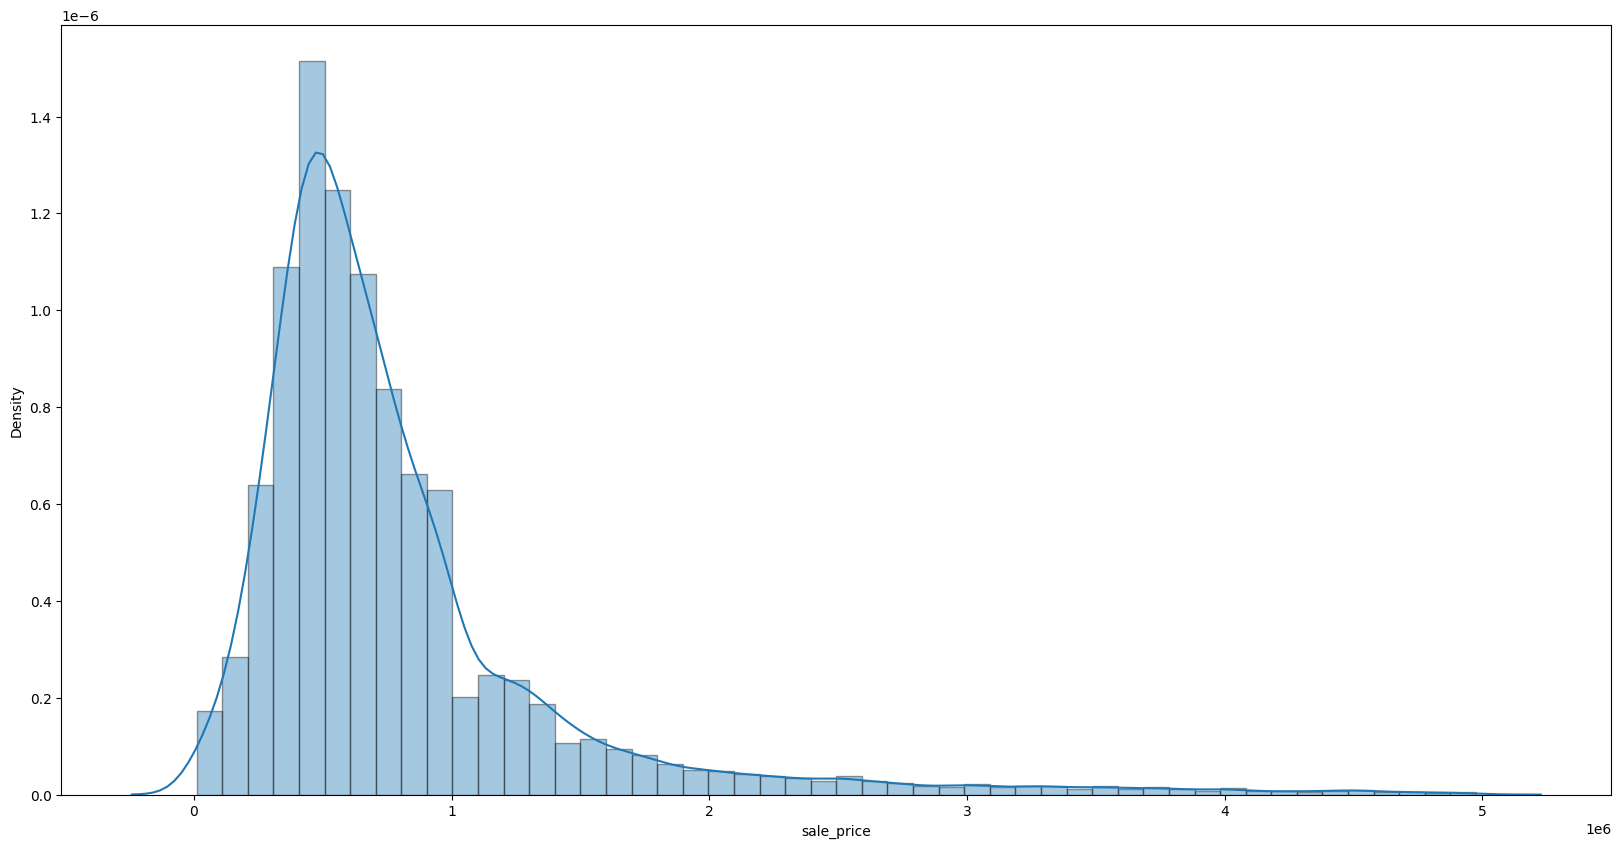

In [91]:
plt.figure(figsize = (20,10))
sns.distplot(df['sale_price'], kde = True, hist_kws=dict(edgecolor="k"))

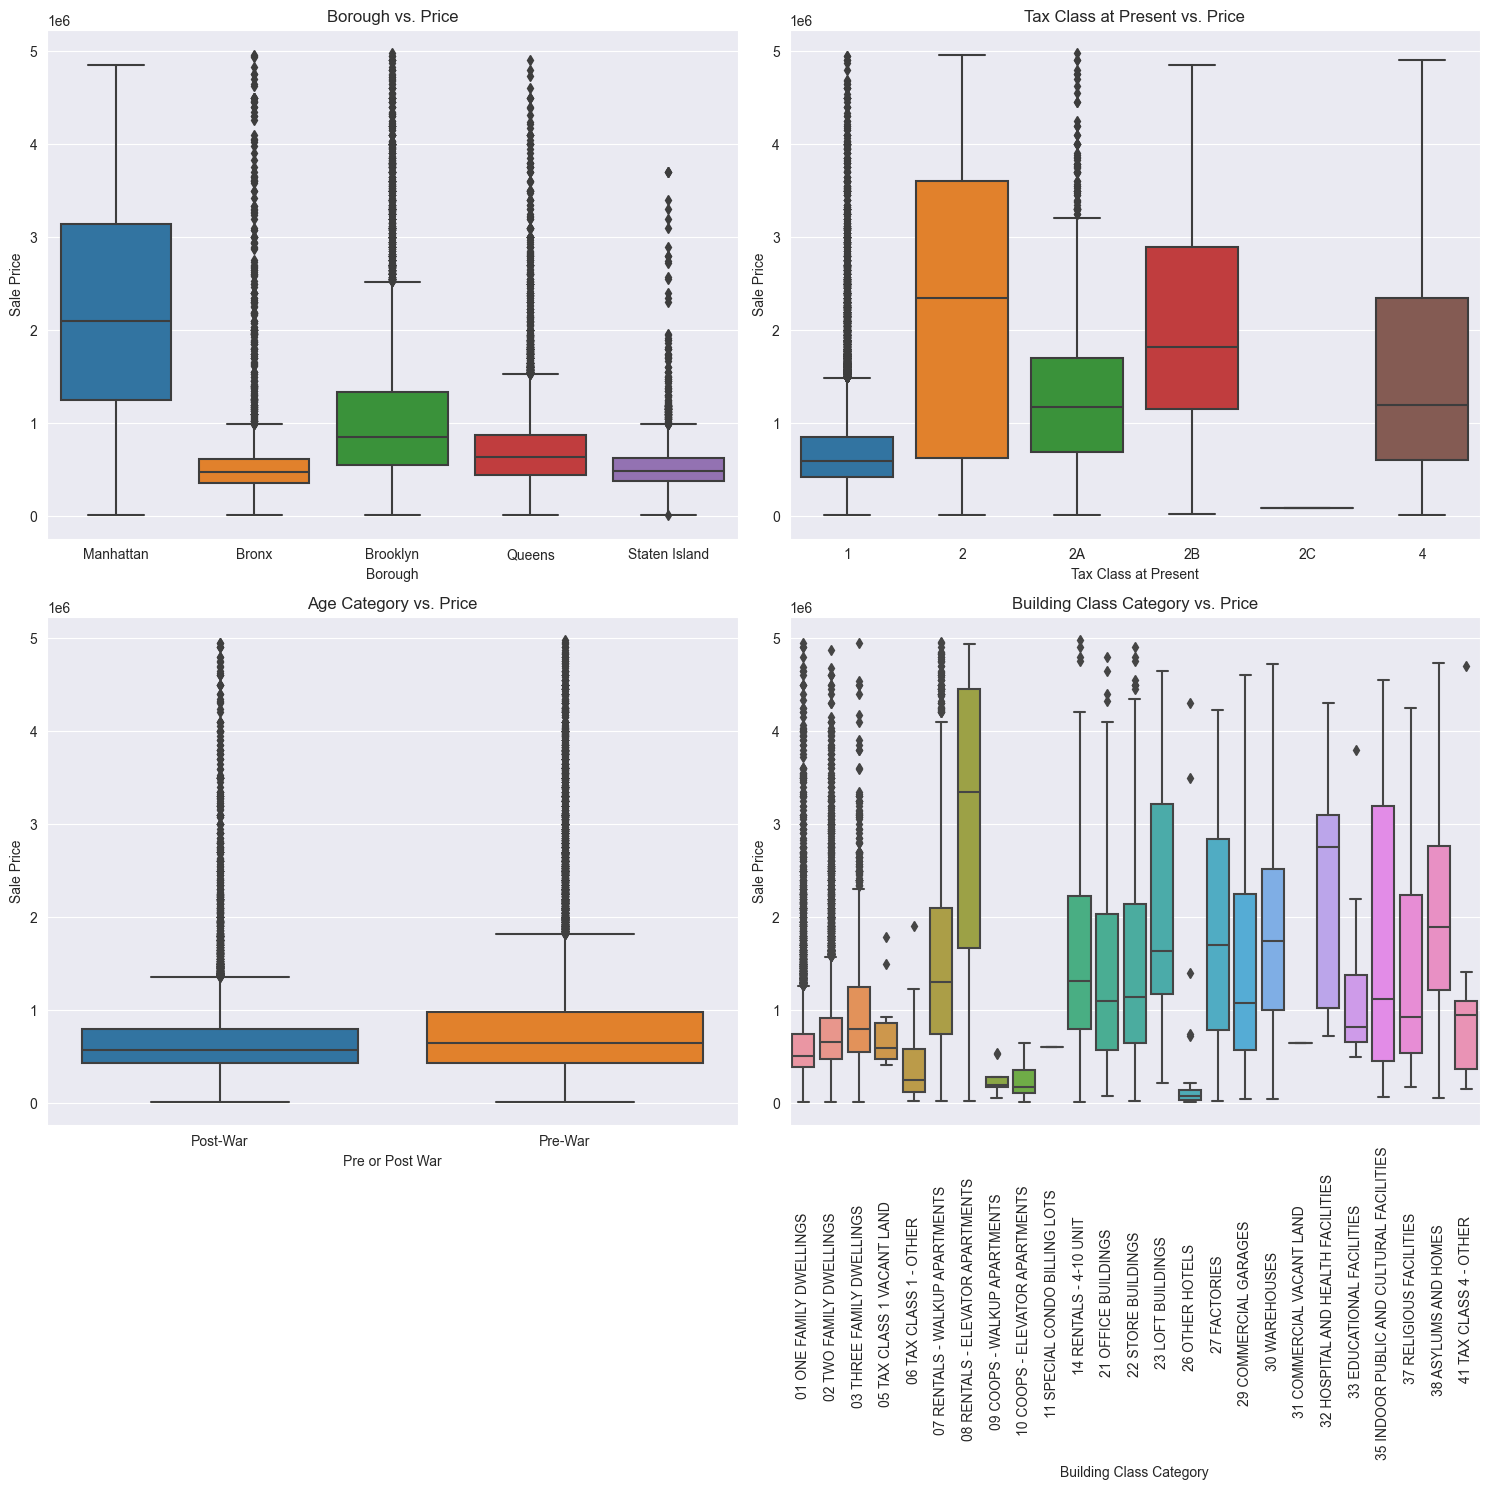

In [57]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

#create order variable to plot unique values only
order_tax = sorted(df['tax_class_at_present'].unique())
order_class = sorted(df['building_class_category'].unique())


#plot of borough category vs price
sns.boxplot(x = 'borough', y = 'sale_price', data = df, ax = axes[0,0])
axes[0,0].set_xlabel('Borough')
axes[0,0].set_ylabel('Sale Price')
axes[0,0].set_title('Borough vs. Price')

#plot of tax class at present vs price
sns.boxplot(x = 'tax_class_at_present', y = 'sale_price', data = df, ax = axes[0,1], order = order_tax)
axes[0,1].set_xlabel('Tax Class at Present')
axes[0,1].set_ylabel('Sale Price')
axes[0,1].set_title('Tax Class at Present vs. Price')

#plot of age classification category vs price
sns.boxplot(x = 'age_category', y = 'sale_price', data = df, ax = axes[1,0])
axes[1,0].set_xlabel('Pre or Post War')
axes[1,0].set_ylabel('Sale Price')
axes[1,0].set_title('Age Category vs. Price')

#plot of building class categories vs price
sns.boxplot(x = 'building_class_category', y = 'sale_price', data = df, ax = axes[1,1], order = order_class)
axes[1,1].set_xlabel('Building Class Category')
axes[1,1].set_ylabel('Sale Price')
axes[1,1].set_title('Building Class Category vs. Price')
plt.xticks(rotation=90)










plt.tight_layout()
plt.show()

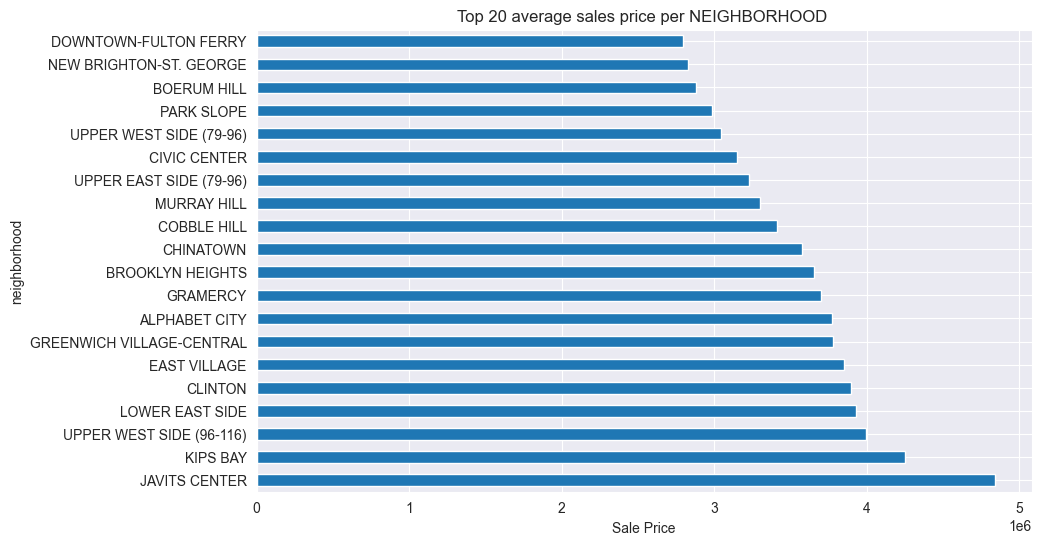

In [58]:
plt.figure(figsize=(10,6))
df['sale_price'].groupby(df['neighborhood']).mean().sort_values(ascending=False)[:20].plot.barh()
plt.title('Top 20 average sales price per NEIGHBORHOOD ')
plt.xlabel("Sale Price");

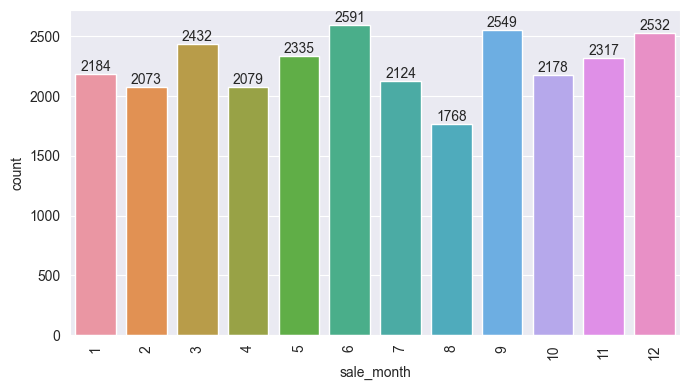

In [59]:
ax = sns.countplot(data=df, x= "sale_month")
ax.bar_label(ax.containers[0]);
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

## Some Insights

 Manhattan has the largest average sale price. Brooklynn comes next in the price ranking.
 
 Properties identified as Tax Class 2 have the highest median price.
 
 The median price for pre-War properties  are more expensive  than properties built post-war.

 The most expensive neighborhood average price of a property is Javits Center.
 
 Sale price increases as residential units increases in general. There are exceptions for 6, 8, 10 (residential units)
 
 Sale price does not change majorly as commercial units increases. (Gradual increase)
 
 The months with the highest and lowest sales are June and August, respectively.



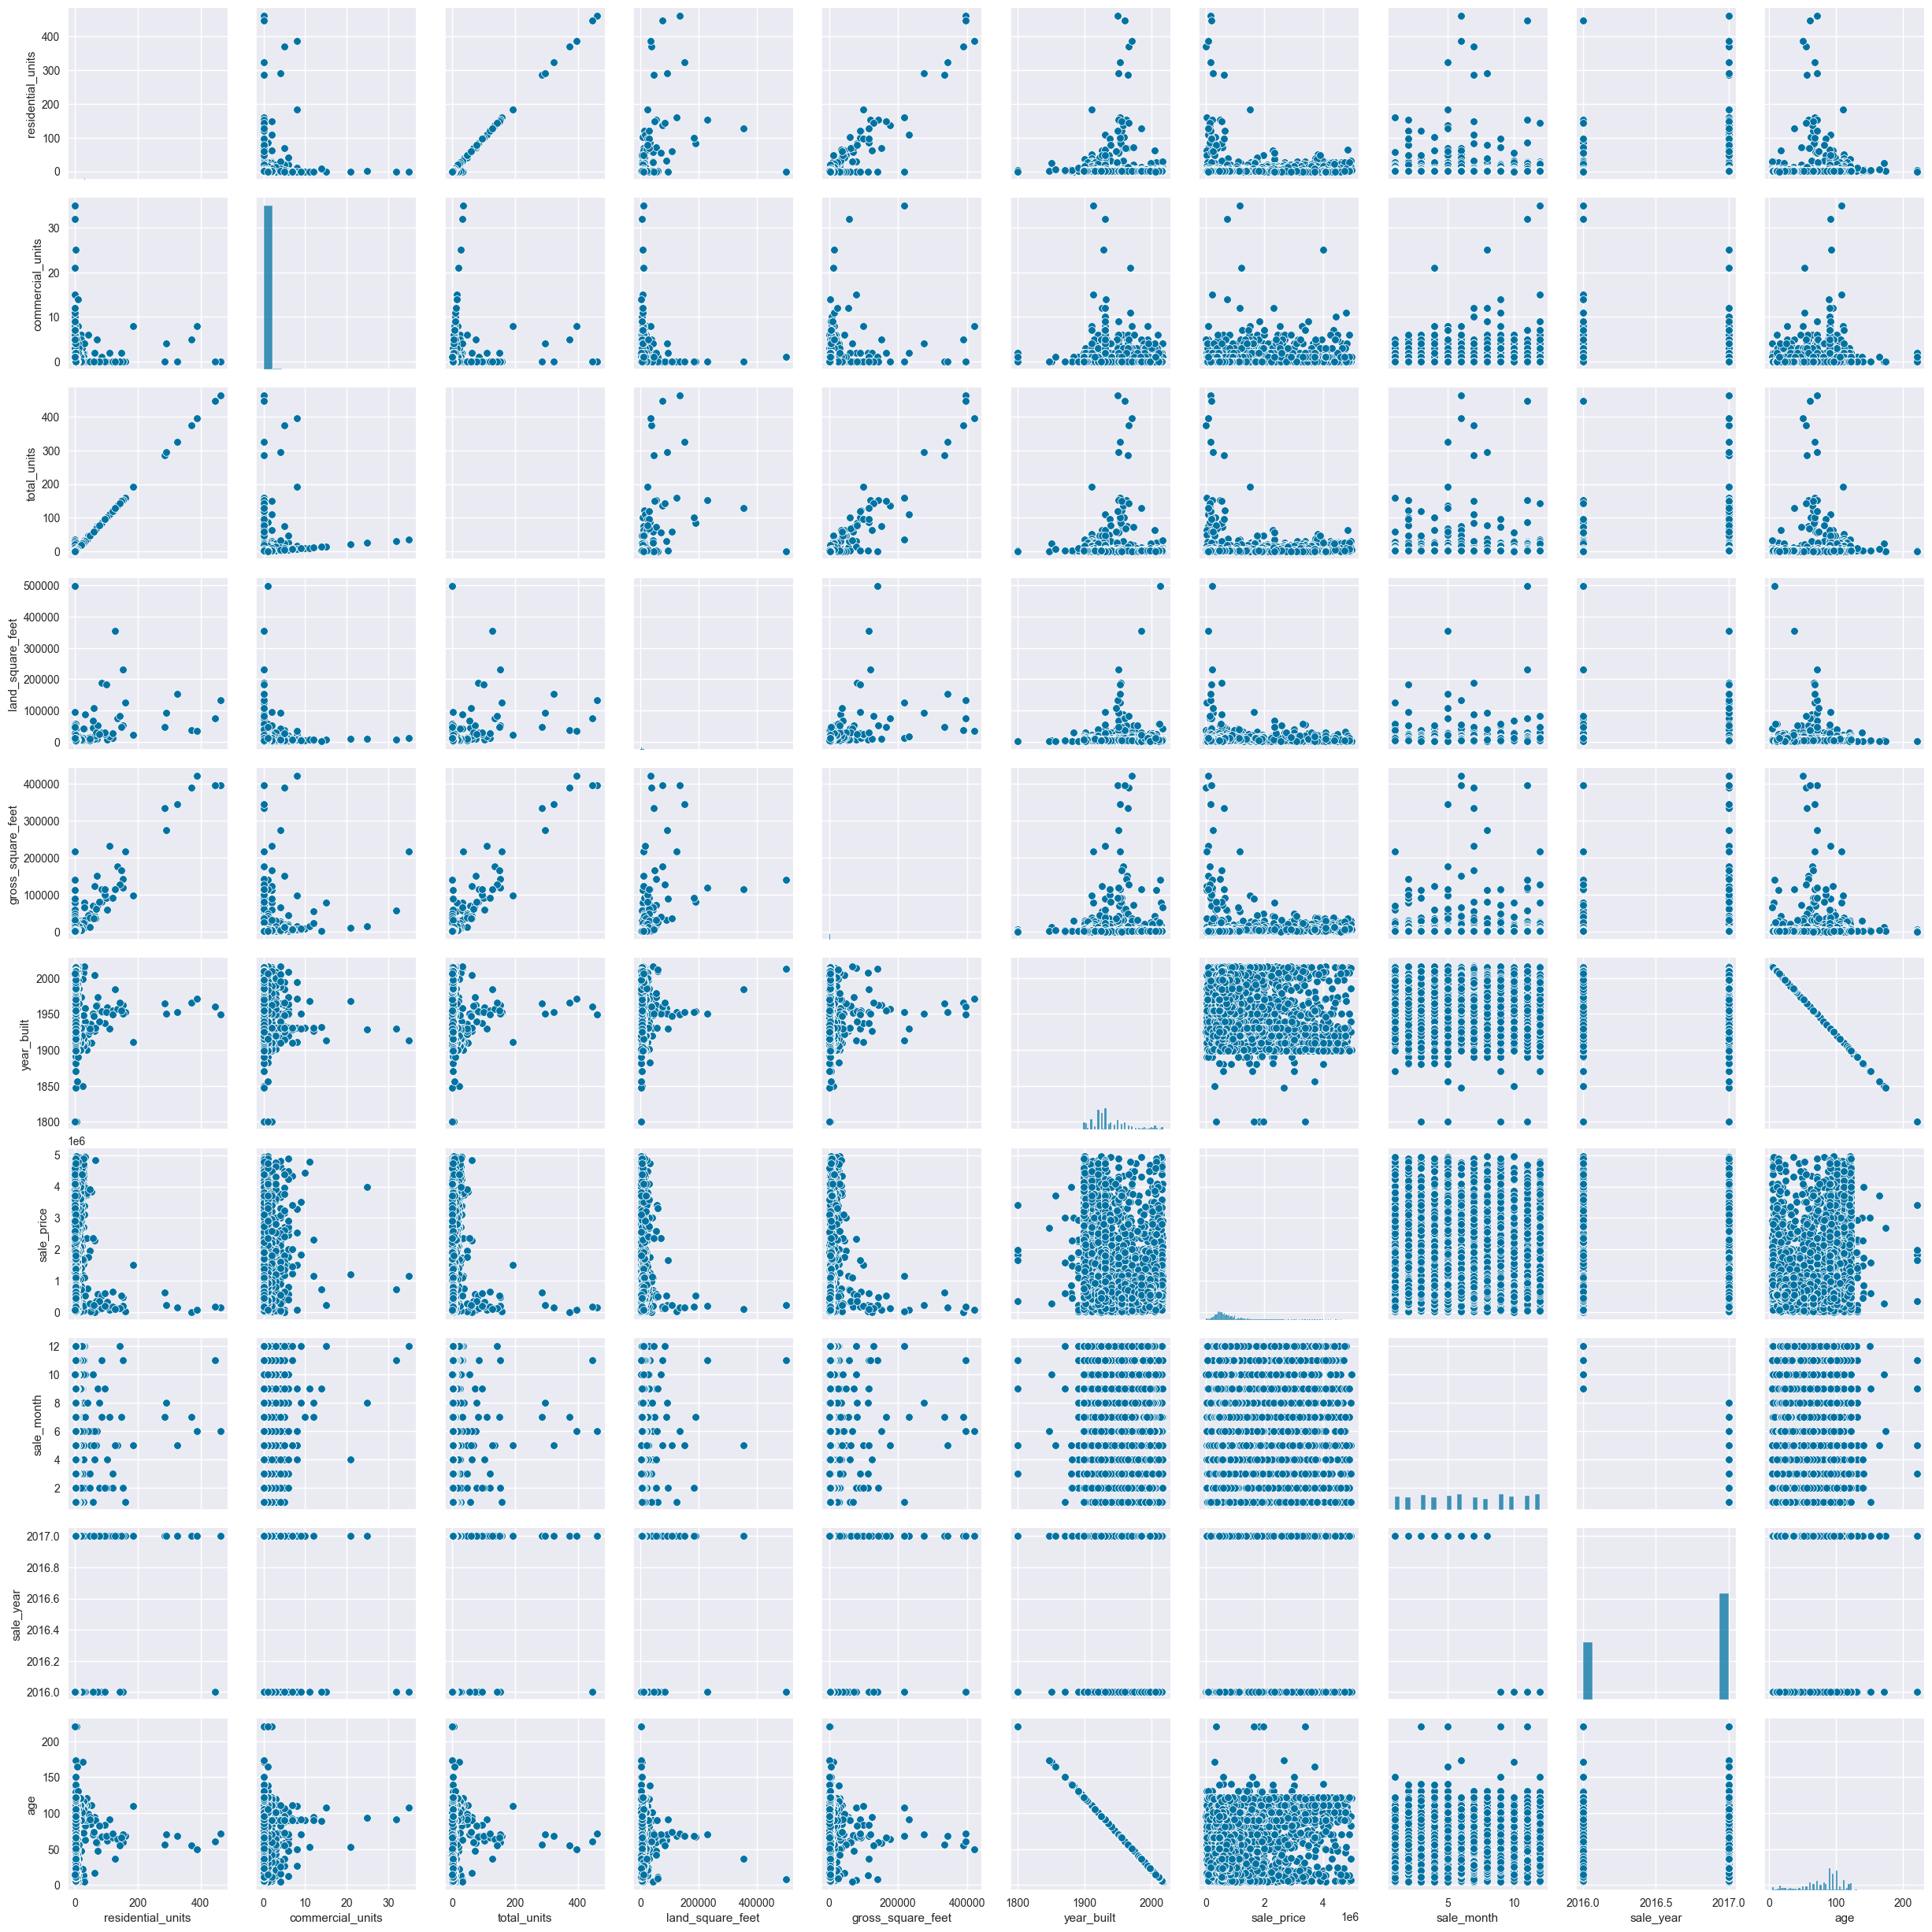

In [232]:
sns.pairplot(df);

# Correlations of Numerical Features VS. Sales Price

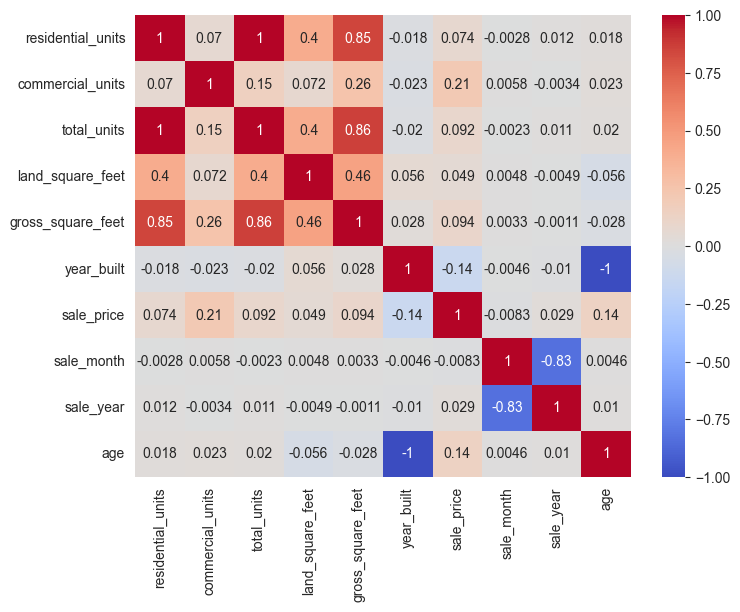

In [60]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap="coolwarm");


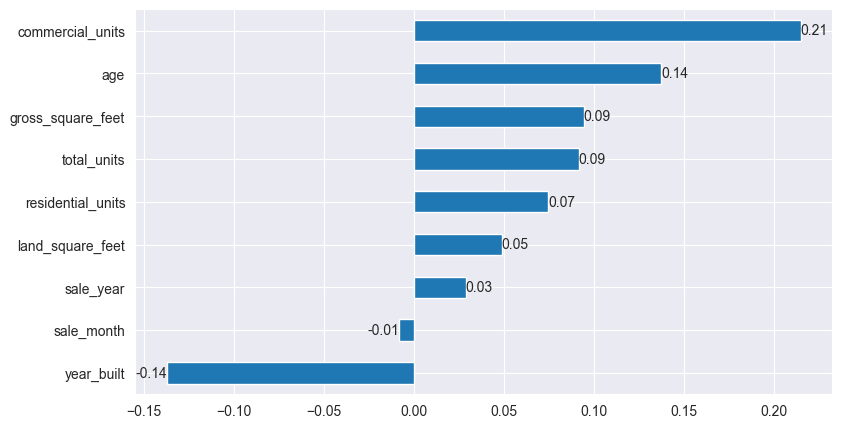

In [61]:
plt.figure(figsize=(9,5))
ax = df.corr()["sale_price"].drop("sale_price").sort_values().plot.barh()
ax.bar_label(ax.containers[0], fmt='%.2f');



## We can see that the feature that has the highest relationship with the target feature sale_price is commercial_units. Other weekly correlated features with target are age, gross_square_feet, total_units, land_square_feet and residental units.

## There are collinerated features such as residential-commercial units which is not surprised for us.

# Data Pre-Processing For ML

In [62]:
df.columns

Index(['borough', 'neighborhood', 'building_class_category',
       'tax_class_at_present', 'block', 'lot', 'ease_ment',
       'building_class_at_present', 'address', 'apartment_number', 'zip_code',
       'residential_units', 'commercial_units', 'total_units',
       'land_square_feet', 'gross_square_feet', 'year_built',
       'tax_class_at_time_of_sale', 'building_class_at_time_of_sale',
       'sale_price', 'sale_date', 'sale_month', 'sale_year', 'age_category',
       'age'],
      dtype='object')

In [63]:
df.head().T

3    \
borough                                                           Manhattan   
neighborhood                                                  ALPHABET CITY   
building_class_category         07 RENTALS - WALKUP APARTMENTS                
tax_class_at_present                                                     2B   
block                                                                   402   
lot                                                                      21   
ease_ment                                                                     
building_class_at_present                                                C4   
address                                                 154 EAST 7TH STREET   
apartment_number                                                              
zip_code                                                              10009   
residential_units                                                        10   
commercial_units                                                          0   
total_units                                                              10   
land_square_feet                                                     2272.0   
gross_square_feet                                                    6794.0   
year_built                                                             1913   
tax_class_at_time_of_sale                                                 2   
building_class_at_time_of_sale                                           C4   
sale_price                                                        3936272.0   
sale_date                                               2016-09-23 00:00:00   
sale_month                                                                9   
sale_year                                                              2016   
age_category                                                        Pre-War   
age                                                                     108   

                                                                        6    \
borough                                                           Manhattan   
neighborhood                                                  ALPHABET CITY   
building_class_category         07 RENTALS - WALKUP APARTMENTS                
tax_class_at_present                                                     2B   
block                                                                   406   
lot                                                                      32   
ease_ment                                                                     
building_class_at_present                                                C4   
address                                                        210 AVENUE B   
apartment_number                                                              
zip_code                                                              10009   
residential_units                                                         8   
commercial_units                                                          0   
total_units                                                               8   
land_square_feet                                                     1750.0   
gross_square_feet                                                    4226.0   
year_built                                                             1920   
tax_class_at_time_of_sale                                                 2   
building_class_at_time_of_sale                                           C4   
sale_price                                                        3192840.0   
sale_date                                               2016-09-23 00:00:00   
sale_month                                                                9   
sale_year                                                              2016   
age_category                                                        Pre-War   
age                                       

In [237]:
for i in df.select_dtypes("category"):
    print(f"{i:<30}:", df[i].nunique())

neighborhood                  : 242
building_class_category       : 25
tax_class_at_present          : 6
block                         : 9662
lot                           : 656
ease_ment                     : 1
building_class_at_present     : 99
address                       : 26495
apartment_number              : 28
zip_code                      : 170
tax_class_at_time_of_sale     : 3
building_class_at_time_of_sale: 101
age_category                  : 2


## Features Chosen

In [92]:
df = df[["borough", "age","age_category", "building_class_category","tax_class_at_time_of_sale", "residential_units","land_square_feet", "gross_square_feet", "sale_price", "commercial_units", "total_units"]]

In [93]:
df.head()

borough  age age_category                      building_class_category  \
3    Manhattan  108      Pre-War  07 RENTALS - WALKUP APARTMENTS                
6    Manhattan  101      Pre-War  07 RENTALS - WALKUP APARTMENTS                
172  Manhattan  111      Pre-War  14 RENTALS - 4-10 UNIT                        
174  Manhattan  111      Pre-War  14 RENTALS - 4-10 UNIT                        
195  Manhattan  122      Pre-War  22 STORE BUILDINGS                            

    tax_class_at_time_of_sale  residential_units  land_square_feet  \
3                           2                 10            2272.0   
6                           2                  8            1750.0   
172                         2                  3            1520.0   
174                         2                  5            1779.0   
195                         4                  0            1218.0   

     gross_square_feet  sale_price  commercial_units  total_units  
3               6794.0   3936272.0                 0           10  
6               4226.0   3192840.0                 0            8  
172             3360.0   3300000.0                 1            4  
174             3713.0   4750000.0                 1            6  
195             3586.0   3700000.0                 1            1

In [94]:
df.dtypes

borough                        object
age                             int64
age_category                 category
building_class_category      category
tax_class_at_time_of_sale    category
residential_units               int64
land_square_feet              float64
gross_square_feet             float64
sale_price                    float64
commercial_units                int64
total_units                     int64
dtype: object

### Train | Test Split

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X= df.drop(columns="sale_price")
y= df["sale_price"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Converting Object Features into Numerical Features Using Make Column Transformer and Pipeline

In [98]:
cat_onehot = ['borough', 'tax_class_at_time_of_sale', "building_class_category"]
cat_ordinal = ['age_category']
cat_for_age = ['Post-War', 'Pre-War']

In [99]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

enc_ordinal = OrdinalEncoder(categories= [cat_for_age])

column_trans = make_column_transformer((enc_onehot, cat_onehot), 
                                       (enc_ordinal, cat_ordinal),
                                        remainder='passthrough',
                                        verbose_feature_names_out=False)

## Useful User Defined Function

In [105]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : mean_squared_error(y_train, y_train_pred, squared=False)},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : mean_squared_error(y_test, y_pred, squared=False)}}
    
    return pd.DataFrame(scores)

## Linear Model

In [73]:
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("lr", LinearRegression())]

lr_pipe = Pipeline(steps=operations).set_output(transform="pandas")
# If we want the outputs of the given transform algorithms to be dataframes,
# you can add set_output(transform="pandas") to the end of the pipeline.

lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['borough',
                                                   'tax_class_at_time_of_sale',
                                                   'building_class_category']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Post-War',
                                                                              'Pre-War']]),
                                                  ['age_category'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('lr', LinearRegression())])

In [74]:
train_val(lr_pipe, X_train, y_train, X_test, y_test)

train          test
R2    3.062104e-01  2.968591e-01
mae   3.342034e+05  3.426789e+05
mse   2.868533e+11  3.052004e+11
rmse  5.355869e+05  5.524495e+05

## Ridge Model

In [102]:
from sklearn.linear_model import Ridge, Lasso

In [76]:
X_train.head()

borough  age age_category  \
56890         Queens   66     Post-War   
78411  Staten Island   27     Post-War   
55666         Queens   15     Post-War   
37874       Brooklyn   91      Pre-War   
25866       Brooklyn  106      Pre-War   

                           building_class_category tax_class_at_time_of_sale  \
56890  02 TWO FAMILY DWELLINGS                                             1   
78411  01 ONE FAMILY DWELLINGS                                             1   
55666  03 THREE FAMILY DWELLINGS                                           1   
37874  01 ONE FAMILY DWELLINGS                                             1   
25866  02 TWO FAMILY DWELLINGS                                             1   

       residential_units  land_square_feet  gross_square_feet  \
56890                  2            2017.0             1726.0   
78411                  1            1656.0             1260.0   
55666                  3            2750.0             3120.0   
37874                  1            2000.0             1668.0   
25866                  2            1920.0             2850.0   

       commercial_units  total_units  
56890                 0            2  
78411                 0            1  
55666                 0            3  
37874                 0            1  
25866                 0            2

In [77]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

ridge_model = Pipeline(steps=operations)
ridge_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['borough',
                                                   'tax_class_at_time_of_sale',
                                                   'building_class_category']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Post-War',
                                                                              'Pre-War']]),
                                                  ['age_category'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Ridge', Ridge())])

In [78]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

train          test
R2    3.057914e-01  2.961163e-01
mae   3.349748e+05  3.431674e+05
mse   2.870266e+11  3.055229e+11
rmse  5.357486e+05  5.527412e+05

# Cross Validation

In [79]:
operations = [("OneHot_Ordinal_Encoder", column_trans),
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'], 
                        cv=10, 
                        return_train_score=True)


In [80]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              2.939693e-01
train_r2                             3.064202e-01
test_neg_mean_absolute_error        -3.363540e+05
train_neg_mean_absolute_error       -3.348778e+05
test_neg_mean_squared_error         -2.918083e+11
train_neg_mean_squared_error        -2.867651e+11
test_neg_root_mean_squared_error    -5.400016e+05
train_neg_root_mean_squared_error   -5.355022e+05
dtype: float64

#  Finding best alpha for Ridge GridSearchCV

In [108]:
from sklearn.model_selection import GridSearchCV

In [107]:
alpha_space = np.linspace(0.001, 100, 100)

In [83]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Ridge", Ridge())]

pipe_model = Pipeline(steps=operations)

param_grid = {'Ridge__alpha':alpha_space}  # # Parameter names should be used together with the model name defined
                                           # in the pipeline..

ridge_grid_model = GridSearchCV(estimator=pipe_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)


In [84]:
pipe_model.get_params()

{'memory': None,
 'steps': [('OneHot_Ordinal_Encoder',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('onehotencoder',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['borough', 'tax_class_at_time_of_sale',
                                     'building_class_category']),
                                   ('ordinalencoder',
                                    OrdinalEncoder(categories=[['Post-War',
                                                                'Pre-War']]),
                                    ['age_category'])],
                     verbose_feature_names_out=False)),
  ('scaler', MinMaxScaler()),
  ('Ridge', Ridge())],
 'verbose': False,
 'OneHot_Ordinal_Encoder': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehotencoder',
                                  OneHotEnc

In [85]:
ridge_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['borough',
                                                                          'tax_class_at_time_of_sale',
                                                                          'building_class_category']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Post-War',
                                                                                                     'Pre-War']]),
                                                                         ['age_cate...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [86]:
ridge_grid_model.best_estimator_


Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['borough',
                                                   'tax_class_at_time_of_sale',
                                                   'building_class_category']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Post-War',
                                                                              'Pre-War']]),
                                                  ['age_category'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()),
                ('Ridge', Ridge(alpha=3.0312727272727273))])

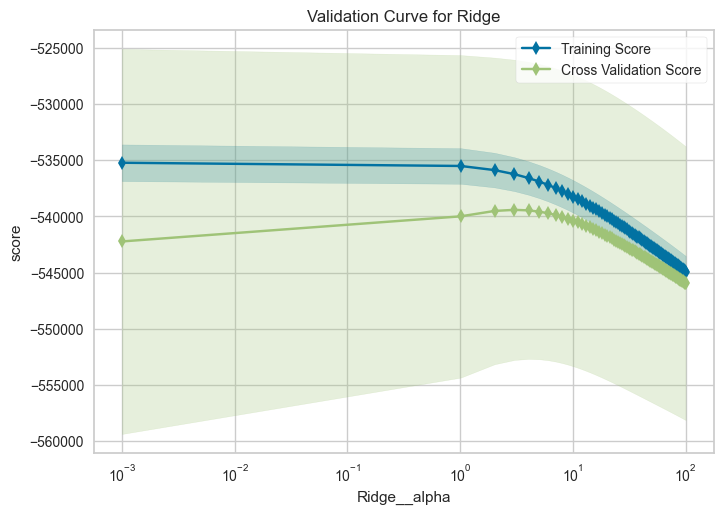

In [87]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
                      pipe_model, 
                      param_name="Ridge__alpha", 
                      param_range=np.linspace(0.001, 100, 100),
                      logx=True, 
                      cv=10, 
                      scoring="neg_root_mean_squared_error",
                      n_jobs=-1
)

viz.fit(X_train, y_train)
viz.show();

In [88]:
pd.DataFrame(ridge_grid_model.cv_results_).loc[ridge_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -539412.773348
mean_train_score   -536237.742063
Name: 3, dtype: object

In [89]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

train          test
R2    3.041842e-01  2.928829e-01
mae   3.359818e+05  3.442258e+05
mse   2.876911e+11  3.069263e+11
rmse  5.363684e+05  5.540093e+05

# Lasso

In [110]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

lasso_model = Pipeline(steps=operations)

lasso_model.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['borough',
                                                   'tax_class_at_time_of_sale',
                                                   'building_class_category']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Post-War',
                                                                              'Pre-War']]),
                                                  ['age_category'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso())])

In [111]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

train          test
R2    3.063397e-01  2.984021e-01
mae   3.339414e+05  3.421340e+05
mse   2.867999e+11  3.045307e+11
rmse  5.355370e+05  5.518430e+05

In [112]:
test_error_rate=5.518430e+05/y_test.mean()
train_erro_rate=5.355370e+05/y_train.mean()

print("test_error_rate  :", test_error_rate)
print("train_erro_rate  :", train_erro_rate)

test_error_rate  : 0.690598541309222
train_erro_rate  : 0.6758585349735745


# Cross Validation

In [113]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

pipe_model = Pipeline(steps=operations)
scores = cross_validate(pipe_model, 
                        X_train, 
                        y_train,
                        scoring=['r2', 
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error'],
                        cv=10, 
                        return_train_score=True)

In [114]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              2.880073e-01
train_r2                             3.071456e-01
test_neg_mean_absolute_error        -3.355725e+05
train_neg_mean_absolute_error       -3.337192e+05
test_neg_mean_squared_error         -2.943431e+11
train_neg_mean_squared_error        -2.864652e+11
test_neg_root_mean_squared_error    -5.422626e+05
train_neg_root_mean_squared_error   -5.352220e+05
dtype: float64

## Finding best alpha for Lasso

In [115]:
operations = [("OneHot_Ordinal_Encoder", column_trans), 
              ("scaler", MinMaxScaler()), 
              ("Lasso", Lasso())]

model = Pipeline(steps=operations)

param_grid = {'Lasso__alpha':alpha_space}# Parameter names should be used together with the model name defined in the pipeline.

lasso_grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [116]:
lasso_grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OneHot_Ordinal_Encoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['borough',
                                                                          'tax_class_at_time_of_sale',
                                                                          'building_class_category']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Post-War',
                                                                                                     'Pre-War']]),
                                                                         ['age_cate...
       8.08082727e+01, 8.18183636e+01, 8.28284545e+01, 8.38385455e+01,
       8.48486364e+01, 8.58587273e+01, 8.68688182e+01, 8.78789091e+01,
       8.88890000e+01, 8.98990909e+01, 9.09091818e+01, 9.19192727e+01,
       9.29293636e+01, 9.39394545e+01, 9.49495455e+01, 9.59596364e+01,
       9.69697273e+01, 9.79798182e+01, 9.89899091e+01, 1.00000000e+02])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [117]:
lasso_grid_model.best_estimator_

Pipeline(steps=[('OneHot_Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['borough',
                                                   'tax_class_at_time_of_sale',
                                                   'building_class_category']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Post-War',
                                                                              'Pre-War']]),
                                                  ['age_category'])],
                                   verbose_feature_names_out=False)),
                ('scaler', MinMaxScaler()), ('Lasso', Lasso(alpha=100.0))])

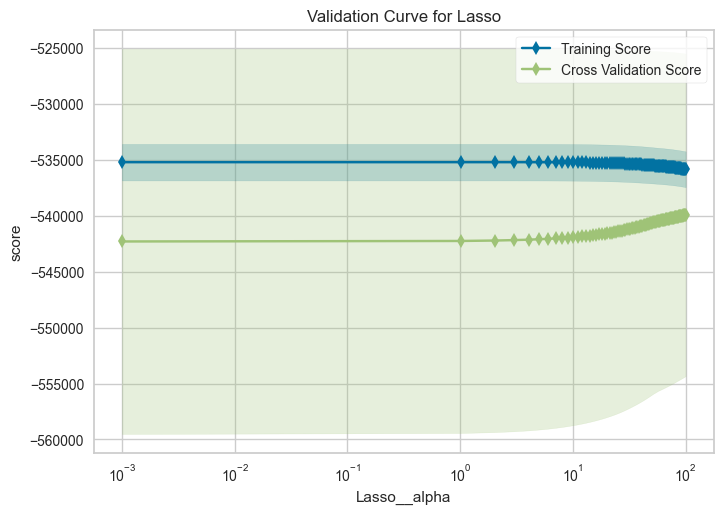

In [118]:
from yellowbrick.model_selection import ValidationCurve
viz = ValidationCurve(
                      pipe_model, 
                      param_name="Lasso__alpha", 
                      param_range=np.linspace(0.001, 100, 100),
                      logx=True, 
                      cv=10, 
                      scoring="neg_root_mean_squared_error",
                      n_jobs=-1
)

viz.fit(X_train, y_train)
viz.show();

In [119]:
pd.DataFrame(lasso_grid_model.cv_results_).loc[lasso_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -539933.036833
mean_train_score   -535855.459524
Name: 99, dtype: object

In [120]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

train          test
R2    3.047894e-01  2.953629e-01
mae   3.353135e+05  3.433360e+05
mse   2.874408e+11  3.058499e+11
rmse  5.361351e+05  5.530370e+05

In [121]:
y_pred = lasso_grid_model.predict(X_test)
lasm_R2 = r2_score(y_test, y_pred)
lasm_mae = mean_absolute_error(y_test, y_pred)
lasm_rmse = mean_squared_error(y_test, y_pred, squared=False)

## Feature İmportance/selection

In [127]:
df_feat_imp =pd.DataFrame(
                         data=lasso_grid_model.best_estimator_["Lasso"].coef_, 
                         index=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out(), 
                         columns=["Coef"]
                         ).sort_values("Coef")
df_feat_imp

Coef
building_class_category_26 OTHER HOTELS        ... -100.000000
building_class_category_10 COOPS - ELEVATOR APA...  -81.033790
building_class_category_09 COOPS - WALKUP APART...  -66.617578
tax_class_at_time_of_sale_1                         -28.900039
building_class_category_33 EDUCATIONAL FACILITI...  -24.350087
building_class_category_37 RELIGIOUS FACILITIES...  -20.613277
borough_Bronx                                       -10.029182
borough_Staten Island                                -7.373701
age_category                                         -4.536415
building_class_category_01 ONE FAMILY DWELLINGS...   -4.350521
building_class_category_21 OFFICE BUILDINGS    ...   -1.467485
building_class_category_05 TAX CLASS 1 VACANT L...    0.000000
residential_units                                     0.000000
building_class_category_41 TAX CLASS 4 - OTHER ...   -0.000000
borough_Queens                                       -0.000000
building_class_category_31 COMMERCIAL VACANT LA...   -0.000000
tax_class_at_time_of_sale_2                           0.000000
building_class_category_23 LOFT BUILDINGS      ...   -0.000000
building_class_category_22 STORE BUILDINGS     ...   -0.000000
total_units                                           0.000000
building_class_category_11 SPECIAL CONDO BILLIN...   -0.000000
tax_class_at_time_of_sale_4                           0.000000
building_class_category_06 TAX CLASS 1 - OTHER ...   -0.000000
building_class_category_02 TWO FAMILY DWELLINGS...   -0.000000
building_class_category_07 RENTALS - WALKUP APA...    1.888104
building_class_category_29 COMMERCIAL GARAGES  ...    2.505190
building_class_category_14 RENTALS - 4-10 UNIT ...    3.173750
building_class_category_03 THREE FAMILY DWELLIN...    7.406589
building_class_category_38 ASYLUMS AND HOMES   ...    8.177886
borough_Brooklyn                                     12.262038
age                                                  12.774218
building_class_category_35 INDOOR PUBLIC AND CU...   12.874274
building_class_category_30 WAREHOUSES          ...   19.663051
building_class_category_27 FACTORIES           ...   19.927920
gross_square_feet                                    25.259992
building_class_category_32 HOSPITAL AND HEALTH ...   32.916640
building_class_category_08 RENTALS - ELEVATOR A...   46.701089
borough_Manhattan                                    50.651006
commercial_units                                     74.645776
land_square_feet                                     85.479924

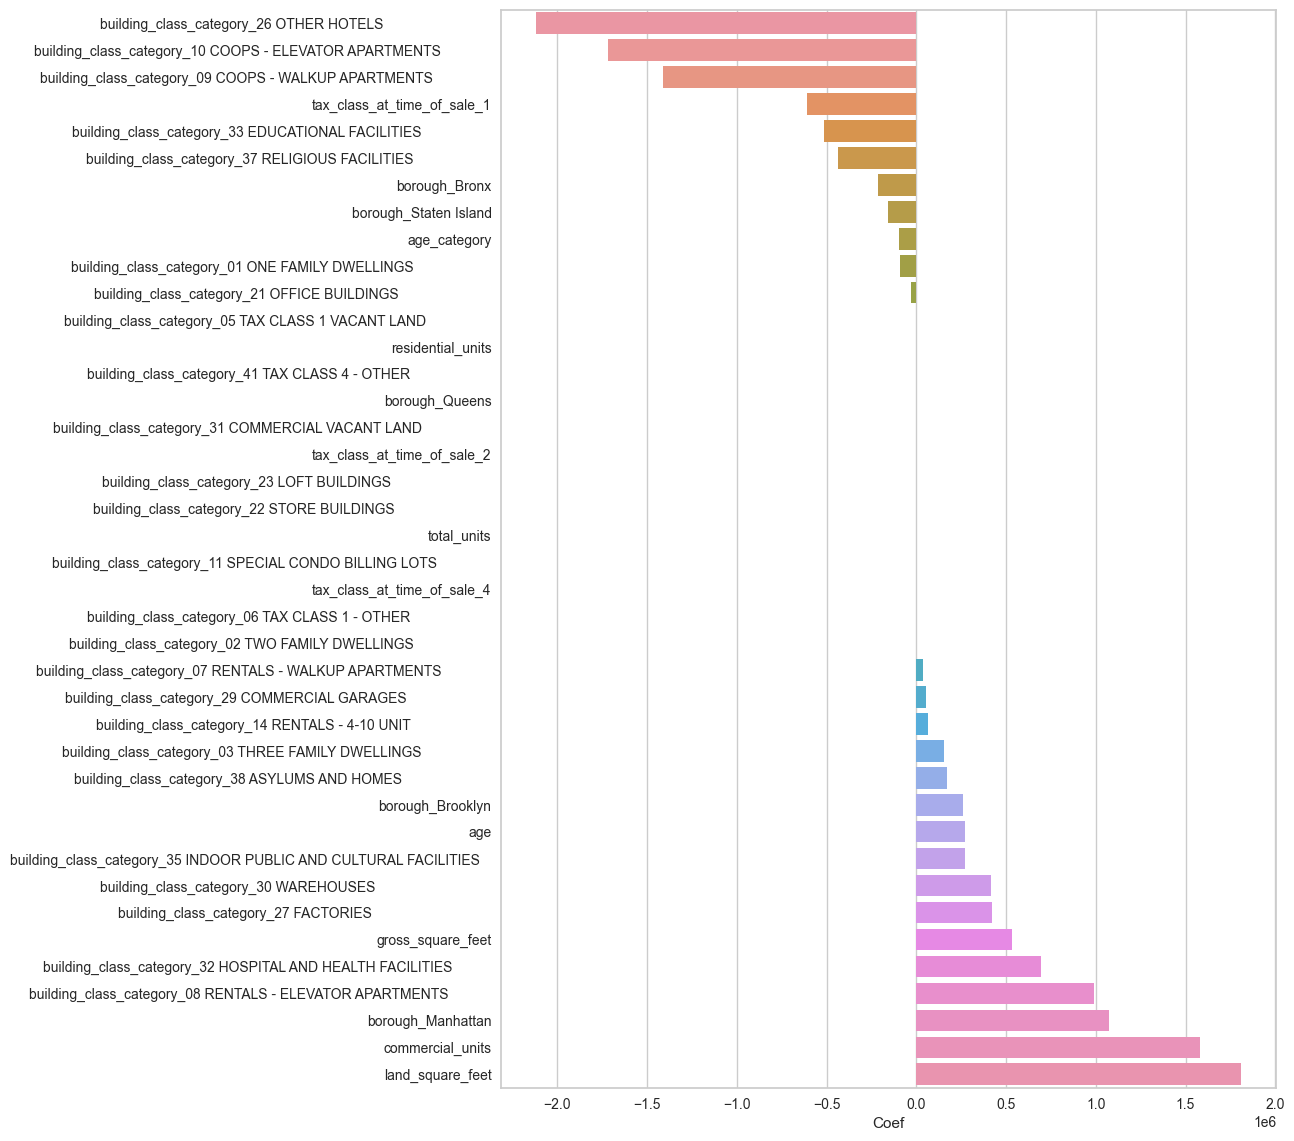

In [123]:
plt.figure(figsize=(10,14))
sns.barplot(data= df_feat_imp, 
            x=df_feat_imp.Coef, 
            y=df_feat_imp.index);

In [124]:
lasso_grid_model.best_estimator_["Lasso"]

Lasso(alpha=100.0)

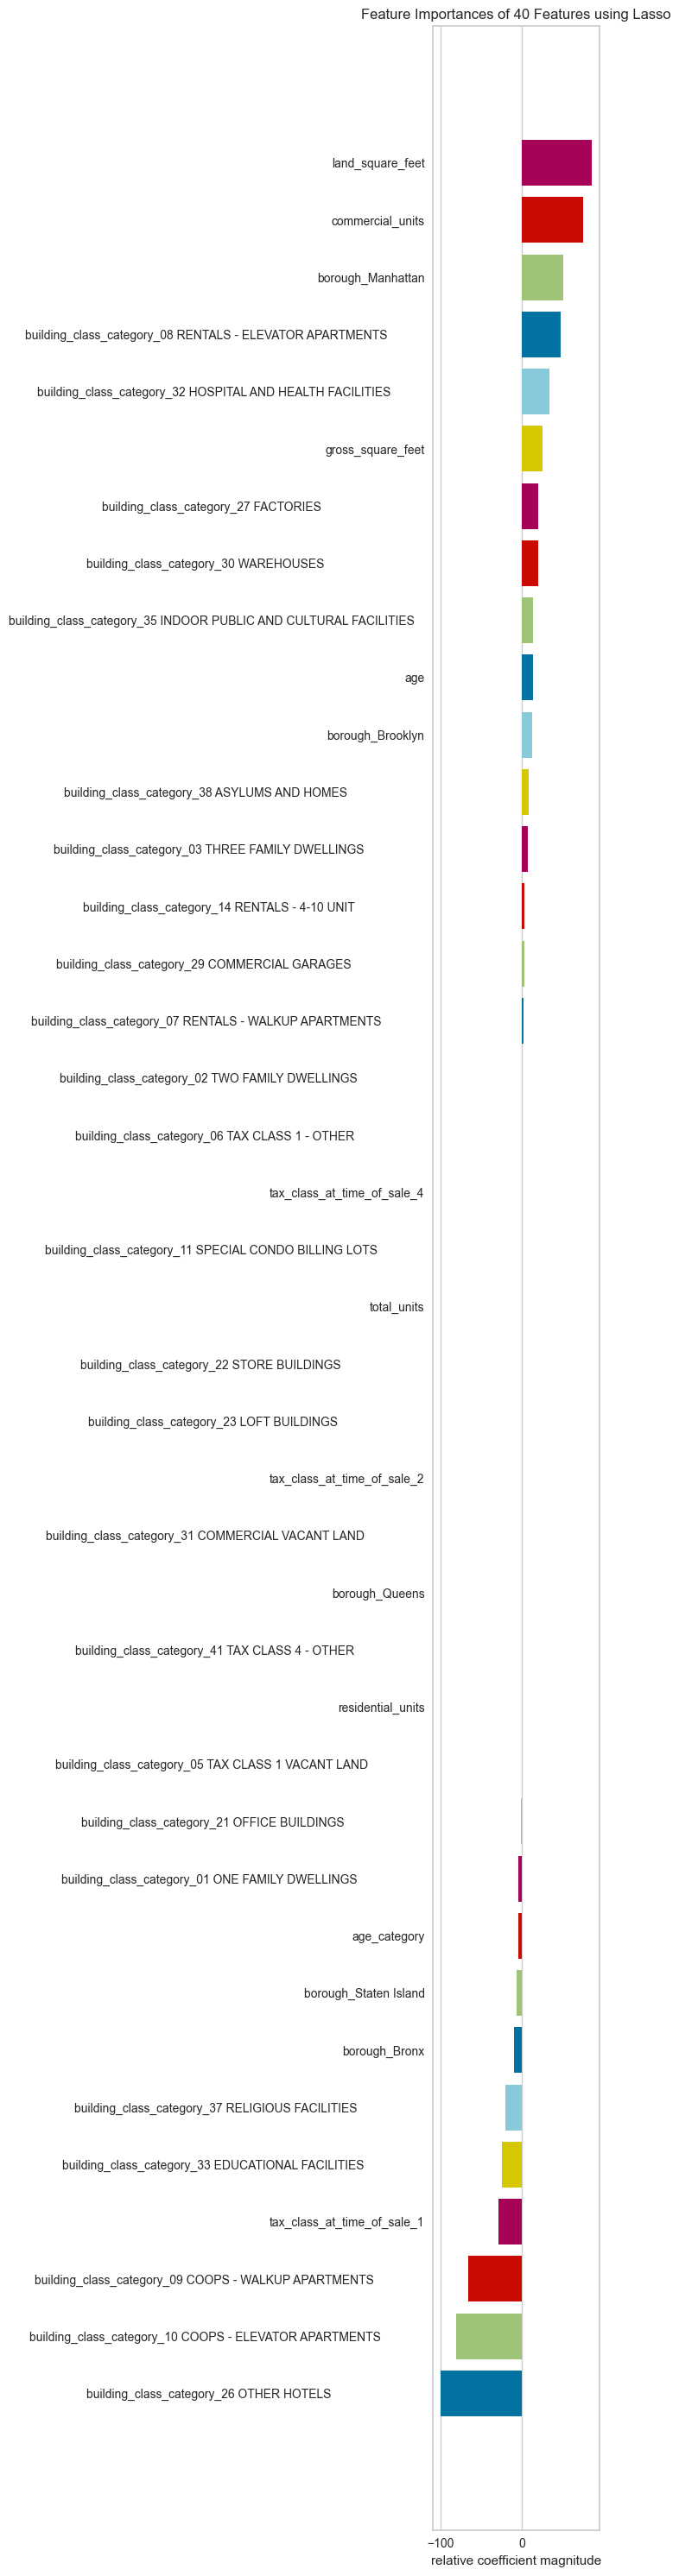

In [125]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

model = lasso_grid_model.best_estimator_["Lasso"] # Lasso(alpha=0.001)

viz = FeatureImportances(model, 
                         labels=lasso_grid_model.best_estimator_["OneHot_Ordinal_Encoder"].get_feature_names_out())

visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show();

## The most important features are land square feet,commercial units, Manhattan(borough) positively and some building class categories (other hotels, elevator apartments, walkup) negatively.

# Random Forest

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:

from sklearn.pipeline import Pipeline

operations = [("Onehot_OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(random_state=101))]

pipe_model_rf = Pipeline(steps=operations)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('Onehot_OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['borough',
                                                   'tax_class_at_time_of_sale',
                                                   'building_class_category']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Post-War',
                                                                              'Pre-War']]),
                                                  ['age_category'])],
                                   verbose_feature_names_out=False)),
                ('RF_model', RandomForestRegressor(random_state=101))])

In [130]:
train_val(pipe_model_rf, X_train, y_train, X_test, y_test)

train          test
R2    9.169786e-01  4.764802e-01
mae   1.110061e+05  2.861786e+05
mse   3.432593e+10  2.272353e+11
rmse  1.852726e+05  4.766921e+05

In [93]:
from sklearn.model_selection import cross_validate

operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model,
                        X_train,
                        y_train,
                        scoring=['r2',
                                 'neg_mean_absolute_error',
                                 'neg_mean_squared_error',
                                 'neg_root_mean_squared_error',
                                 'neg_mean_absolute_percentage_error'],
                        cv =10,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]


test_r2                                     4.780940e-01
train_r2                                    9.171569e-01
test_neg_mean_absolute_error               -2.778681e+05
train_neg_mean_absolute_error              -1.108955e+05
test_neg_mean_squared_error                -2.157421e+11
train_neg_mean_squared_error               -3.425192e+10
test_neg_root_mean_squared_error           -4.642921e+05
train_neg_root_mean_squared_error          -1.850704e+05
test_neg_mean_absolute_percentage_error    -7.291402e-01
train_neg_mean_absolute_percentage_error   -2.948017e-01
dtype: float64

## Overfit Problem so HyperTuning

In [131]:
operations = [("OrdinalEncoder", column_trans),
              ("RF_model", RandomForestRegressor(n_jobs=-1, random_state=101))]

model = Pipeline(steps=operations)

In [132]:
param_grid = {"RF_model__criterion":["squared_error", "absolute_error"], # "poisson"
              "RF_model__n_estimators":[50, 100],
              "RF_model__max_depth": [2,3],
              "RF_model__min_samples_leaf": [1, 2, 3],
              "RF_model__min_samples_split": [2, 3],
              "RF_model__max_features":['auto', X.shape[1]/3, 6]} #None, auto, 1.0 all same


In [133]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs=-1,
                          return_train_score=True)

In [134]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['borough',
                                                                          'tax_class_at_time_of_sale',
                                                                          'building_class_category']),
                                                                        ('ordinalencoder',
                                                                         OrdinalEncoder(categories=[['Post-War',
                                                                                                     'Pre-War']]),
                                                                         ['age_category'])]...
                                                              random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__criterion': ['squared_error',
                                                 'absolute_error'],
                         'RF_model__max_depth': [2, 3],
                         'RF_model__max_features': ['auto', 3.3333333333333335,
                                                    6],
                         'RF_model__min_samples_leaf': [1, 2, 3],
                         'RF_model__min_samples_split': [2, 3],
                         'RF_model__n_estimators': [50, 100]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [135]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['borough',
                                                   'tax_class_at_time_of_sale',
                                                   'building_class_category']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Post-War',
                                                                              'Pre-War']]),
                                                  ['age_category'])],
                                   verbose_feature_names_out=False)),
                ('RF_model',
                 RandomForestRegressor(max_depth=3, max_features=6,
                                       n_estimators=50, n_jobs=-1,
                                       random_state=101))])

In [136]:
pd.DataFrame(grid_model.cv_results_).loc[grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

mean_test_score    -539727.036349
mean_train_score   -537893.333315
Name: 60, dtype: object

In [137]:
train_val(grid_model, X_train, y_train, X_test, y_test)

train          test
R2    2.975250e-01  3.053289e-01
mae   3.436511e+05  3.489778e+05
mse   2.904444e+11  3.015241e+11
rmse  5.389290e+05  5.491121e+05